# 00 Packages and Directory

In [1]:
import IPython

import pandas as pd
import matplotlib.pyplot as plt
import qiime2 as q2
import seaborn as sns
from qiime2 import Visualization
import matplotlib.cm as cm
import numpy as np  



import os

import matplotlib.pyplot as plt
%matplotlib inline

data_dir = 'livia_data'

## 01.02 Metadata editing

In [15]:
metadata_clean = pd.read_csv(f"{data_dir}/01/fungut_metadata.tsv", sep="\t")

In [16]:
numeric_cols = ["latitude_sample", "longitude_sample", "age_years_sample", "height_cm_sample", "weight_kg_sample", "bmi_sample",] 

for col in numeric_cols:
    if col in metadata_clean.columns:
        metadata_clean[col] = metadata_clean[col].replace(
            ["Not provided"],
            np.nan
        )

In [17]:
metadata_clean.to_csv(f"{data_dir}/01/metadata_clean.csv", sep="\t", index=False)

wget abelade vom rural file "metadata_rucc"

In [7]:
metadata_rucc = pd.read_csv(f"{data_dir}/01/metadata_rucc.tsv", sep="\t")
metadata_ed = pd.read_csv(f"{data_dir}/01/metadata_rucc.tsv", sep="\t")
bins_bmi = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Adipose 1', 'Adipose 2', 'Adipose 3']
metadata_ed['BMI_category'] = pd.cut(metadata_rucc['bmi_sample'], bins=bins_bmi, labels=labels_bmi, right=True)
metadata_ed.to_csv(f"{data_dir}/01/metadata_ed.tsv", sep="\t", index=False)

In [8]:
metadata_ed.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample,habitat_density1,habitat_density_percent,urban/rural,BMI_category
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,I do not have this condition,No,167906.0,42.0,peri-urban,Underweight
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,I was diagnosed with gluten allergy (anti-glut...,149537.0,37.0,peri-urban,Normal
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,I do not eat gluten because it makes me feel bad,149537.0,37.0,peri-urban,Normal
3,ERR5327282,United Kingdom,Not provided,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No,269388.0,67.0,urban,Normal
4,ERR5327284,United Kingdom,Not provided,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No,380431.0,95.0,urban,Normal


## 01.03 Metadata analysis

Questions:
- What is the distribution of age, height and weight of the sample donors? 
- What types of diets do they have? 
- Which two diseases are reported in the metadata?


The reported diseases are gluten and IBD.

In [21]:
metadata_ed['ibd_sample'].unique()
metadata_ed['ibd_sample'].value_counts(dropna=False)

ibd_sample
I do not have this condition                                         130
Diagnosed by a medical professional (doctor, physician assistant)     11
Not provided                                                           7
Self-diagnosed                                                         2
Name: count, dtype: int64

In [22]:
metadata_ed['gluten_sample'].unique()
metadata_ed['gluten_sample'].value_counts(dropna=False)


gluten_sample
No                                                                               113
I do not eat gluten because it makes me feel bad                                  26
Not provided                                                                       6
I was diagnosed with gluten allergy (anti-gluten IgG), but not celiac disease      4
I was diagnosed with celiac disease                                                1
Name: count, dtype: int64

<div style="background-color: yellow; padding: 20px;">
Versuche plots
</div>

**Diet type and age in categories**

<div style="background-color: yellow; padding: 20px;">
bins und labels umbenennen!!
</div>

In [23]:
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60",
          "61-70", "71-80", "81-90", "91-100"]


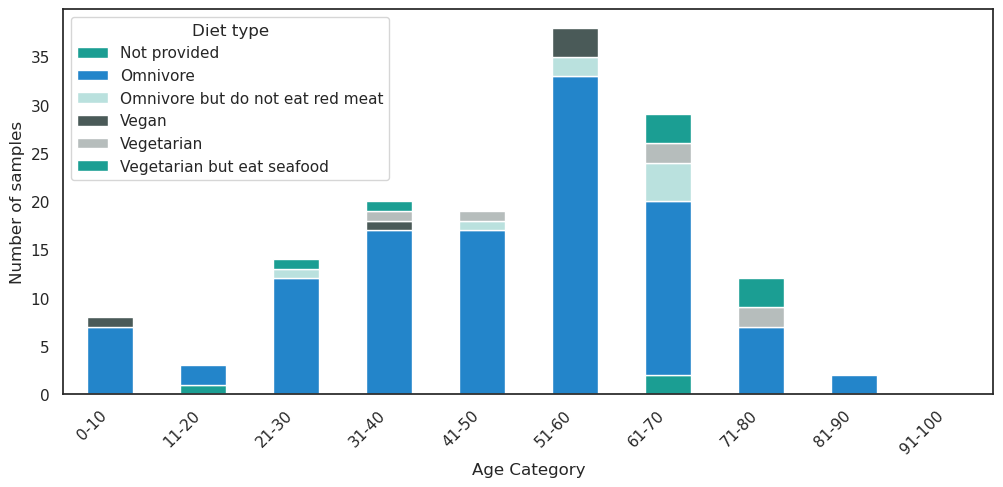

In [39]:
metadata_ed.loc[:, 'age_category'] = pd.cut(
    metadata_ed['age_years_sample'],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True)

subset = metadata_ed.dropna(subset=['age_category', 'diet_type_sample'])
grouped = subset.groupby(
    ['age_category', 'diet_type_sample'],
    observed=False
).size().reset_index(name='sample_count')

stacked = grouped.pivot(
    index='age_category',
    columns='diet_type_sample',
    values='sample_count'
).fillna(0)

num_bars = stacked.shape[1]  
colors = ["#1b9e93", "#2385ca", "#bae1de", "#4a5a58", "#b6bdbc" ]


with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 5))

    stacked.plot(
        kind='bar',
        stacked=True,
        color=colors,    
        ax=ax)
    ax.set_xlabel('Age Category')
    ax.set_ylabel('Number of samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    legend = ax.get_legend()
    legend.set_title('Diet type')


plt.show()

bmi statt diet type

**Relative BMI in diet type**

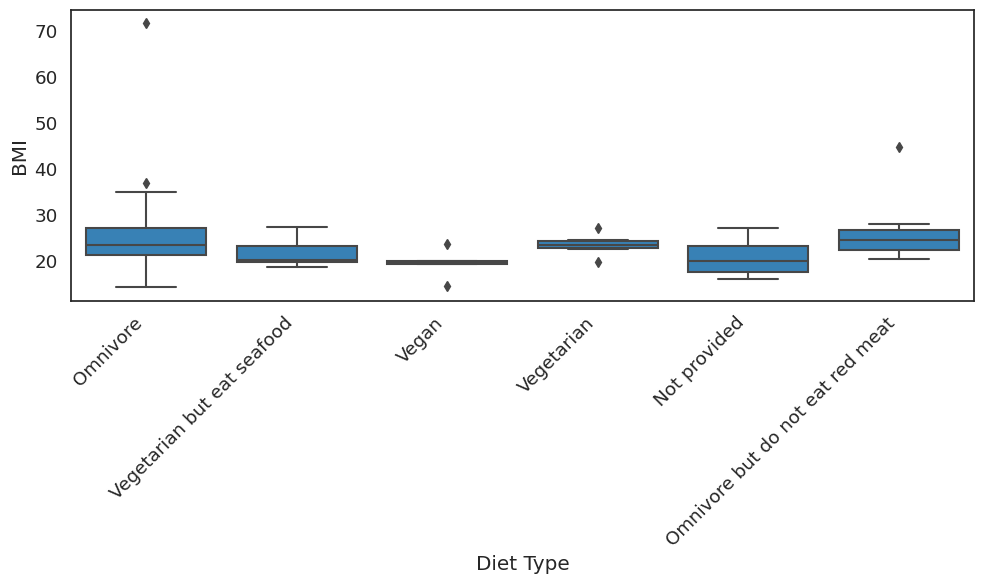

In [29]:

subset = metadata_ed.dropna(
    subset=['diet_type_sample', 'bmi_sample']
).copy()

sns.set(rc={'figure.figsize': (10, 6)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.boxplot(
        data=subset,
        x='diet_type_sample',
        y='bmi_sample',
        color='#2385ca'   
    )
    
    ax.set_xlabel('Diet Type')
    ax.set_ylabel('BMI')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


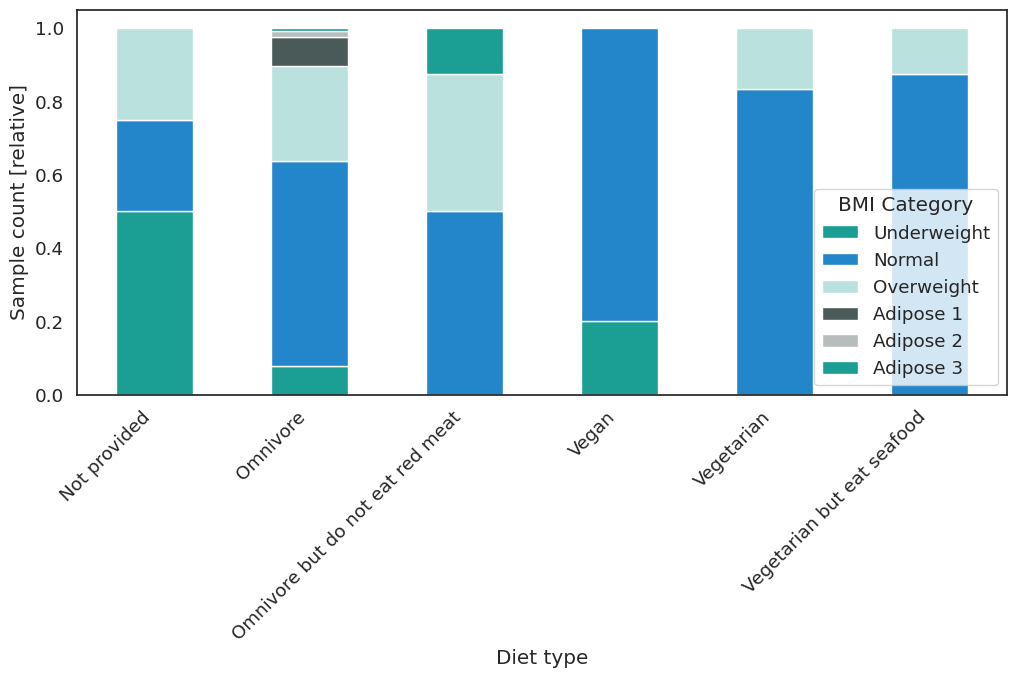

In [30]:
num_bars = stacked.shape[1]  
colors = ["#1b9e93", "#2385ca", "#bae1de", "#4a5a58", "#b6bdbc" ]

subset = metadata_ed.dropna(subset=['diet_type_sample', 'BMI_category']).copy()

grouped = subset.groupby(['diet_type_sample', 'BMI_category'], observed=False) \
                .size() \
                .reset_index(name='sample_count')

stacked = grouped.pivot(
    index='diet_type_sample',
    columns='BMI_category',
    values='sample_count'
).fillna(0)

stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (12, 5)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):

    ax = stacked_rel.plot(
        kind='bar',
        stacked=True,
        color=colors)

    ax.set_xlabel('Diet type')
    ax.set_ylabel('Sample count [relative]')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    legend = ax.get_legend()
    legend.set_title('BMI Category')

plt.show()


**Diet type and IBD**

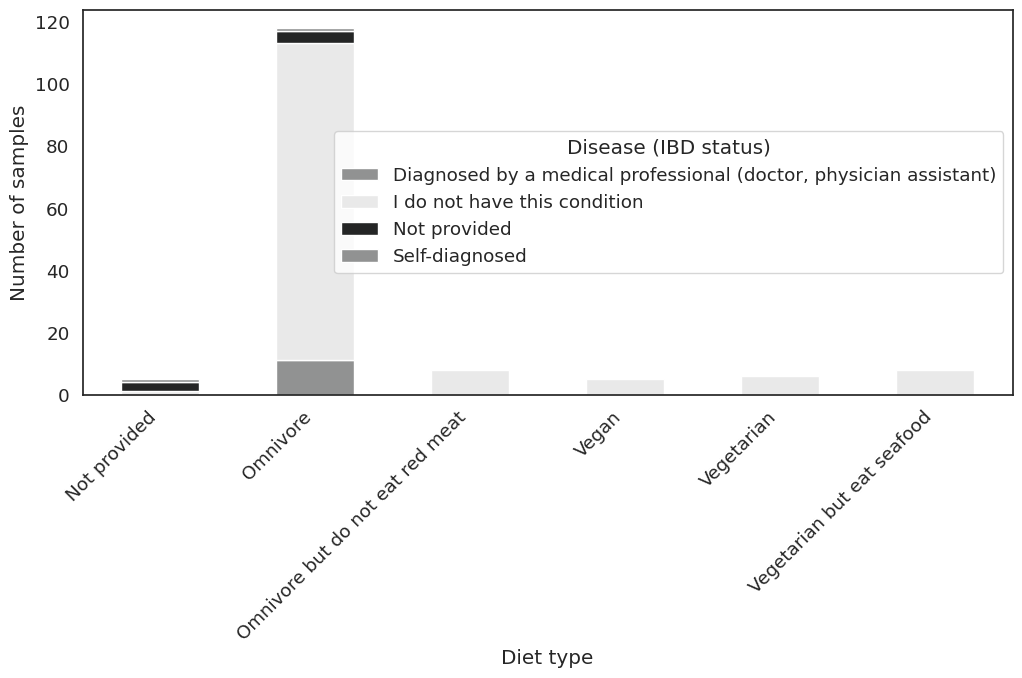

In [31]:
subset_2 = metadata_ed[['diet_type_sample', 'ibd_sample']]

grouped_2 = (
    subset_2
    .groupby(['diet_type_sample', 'ibd_sample'], observed=False)
    .size()
    .reset_index(name='sample_count'))

stacked = grouped_2.pivot(
    index='diet_type_sample',
    columns='ibd_sample',
    values='sample_count'
).fillna(0)

custom_colors = [
    "#919292",  #  "Diagnosed by a medical professional"
    "#e9e9e9",  #  "I do not have this condition"
    "#242525"   # "Self-diagnosed"
]

sns.set(rc={'figure.figsize': (12, 5)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):
    ax = stacked.plot(
        kind='bar',
        stacked=True,
        color=custom_colors )

    ax.set_xlabel('Diet type')
    ax.set_ylabel('Number of samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    legend_2 = ax.get_legend()
    legend_2.set_title('Disease (IBD status)')

plt.show()

**Distribution of BMI trough the age categories**

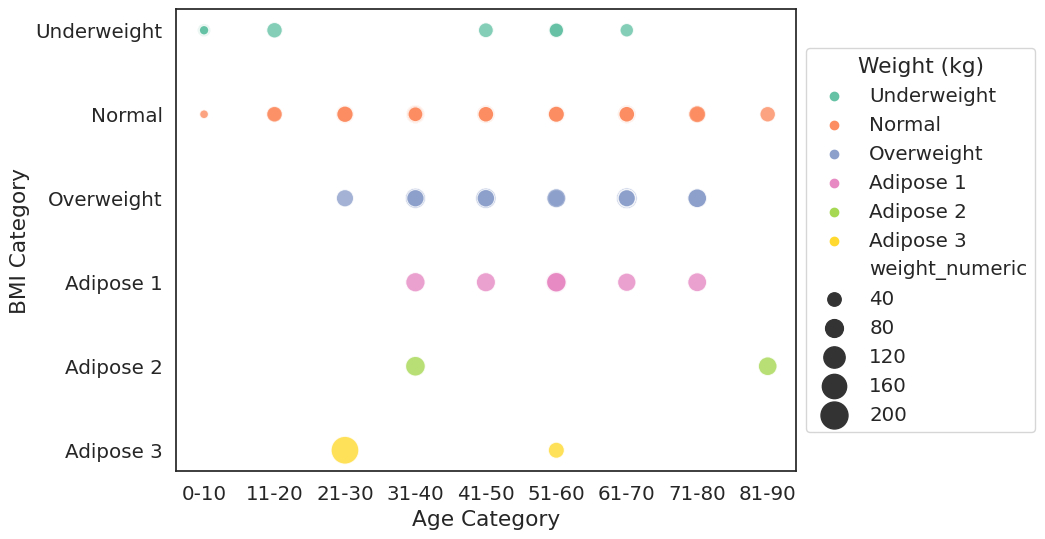

In [34]:
subset = metadata_ed.dropna(
    subset=['age_years_sample', 'weight_kg_sample', 'height_cm_sample', 'BMI_category']
).copy()   


subset.loc[:, 'age_category'] = pd.cut(
    subset['age_years_sample'],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True
)

subset.loc[:, 'weight_numeric'] = subset['weight_kg_sample'].astype(float)

sns.set(rc={'figure.figsize': (8, 6)}, style='white')

with sns.plotting_context("notebook", font_scale=1.3):
    ax = sns.scatterplot(
        data=subset,
        x='age_category',
        y='BMI_category',
        size='weight_numeric',
        sizes=(40, 400),
        alpha=0.8,
        hue='BMI_category',
        palette="Set2"
    )
    
    ax.set_xlabel('Age Category')
    ax.set_ylabel('BMI Category')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], 
              loc='center left', bbox_to_anchor=(1, 0.5),
              title='Weight (kg)')

plt.show()


/tmp/ipykernel_85/1320260374.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = subset.groupby(['age_category', 'BMI_category']).size().reset_index(name='count')


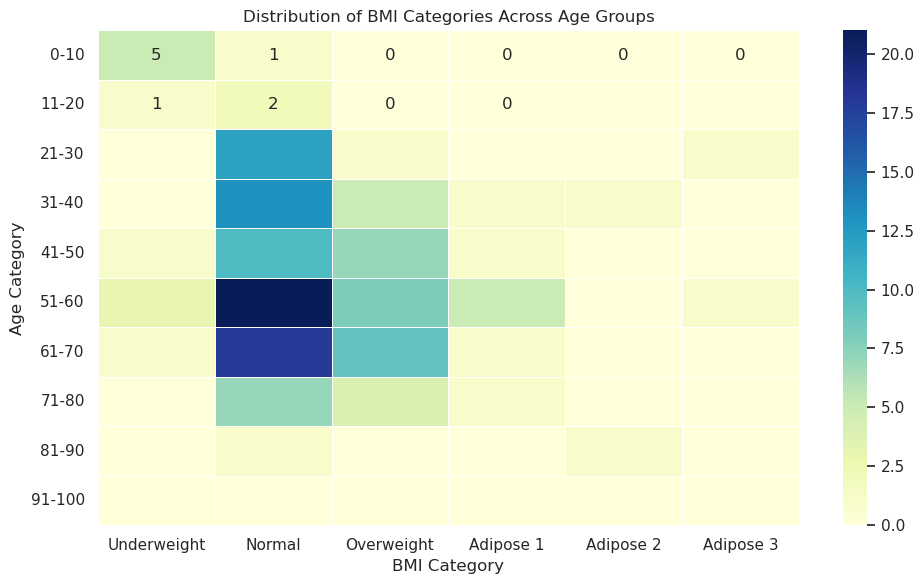

In [35]:
subset = metadata_ed.dropna(
    subset=['age_years_sample', 'weight_kg_sample', 'height_cm_sample', 'BMI_category']
).copy()

subset['age_category'] = pd.cut(
    subset['age_years_sample'],
    bins=bins_age,
    labels=labels_age,
    include_lowest=True
)

counts = subset.groupby(['age_category', 'BMI_category']).size().reset_index(name='count')

heatmap_data = counts.pivot(index='age_category', columns='BMI_category', values='count').fillna(0)


plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,         
    fmt=".0f",
    cmap="YlGnBu",      
    linewidths=0.5,
    linecolor="white"
)

plt.xlabel("BMI Category")
plt.ylabel("Age Category")
plt.title("Distribution of BMI Categories Across Age Groups")

plt.tight_layout()
plt.show()


**BMI (numeric and colors) compared to age**

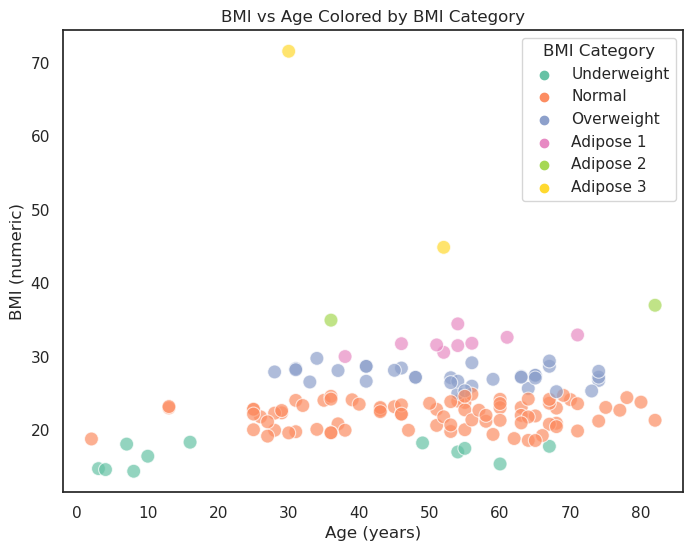

In [36]:
sns.set(style="white", rc={'figure.figsize': (8,6)})

sns.scatterplot(
    data=metadata_ed,
    x='age_years_sample',
    y='bmi_sample',           
    hue='BMI_category',        
    palette="Set2",
    s=100,
    alpha=0.7
)

plt.xlabel("Age (years)")
plt.ylabel("BMI (numeric)")
plt.title("BMI vs Age Colored by BMI Category")
plt.legend(title="BMI Category")
plt.show()


**Disease vs. Gender**

In [37]:
# Define gluten disease categories
gluten_disease_values = [
    "I do not eat gluten because it makes me feel bad",
    "I was diagnosed with gluten allergy (anti-gluten IgG), but not celiac disease",
    "I was diagnosed with celiac disease"
]

# Create the disease flag
metadata_ed['has_disease'] = (
    (metadata_ed['ibd_sample'] == "Diagnosed by a medical professional (doctor, physician assistant)") |
    (metadata_ed['gluten_sample'].isin(gluten_disease_values))
).map({True: "Disease", False: "No disease"})


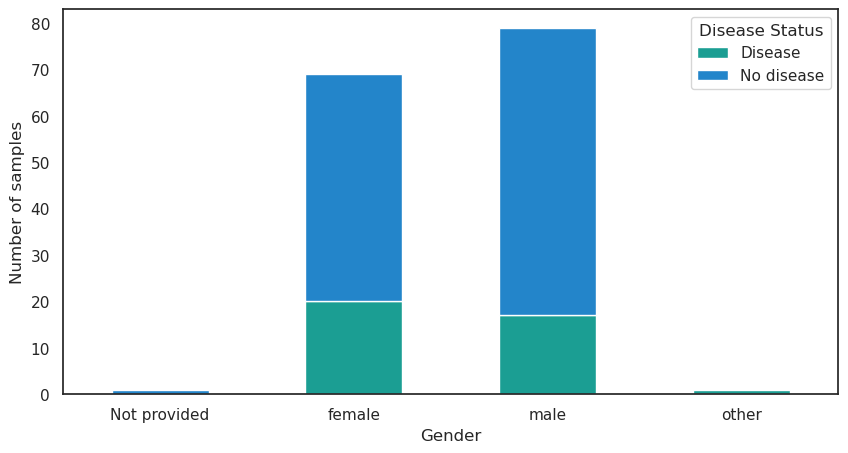

In [38]:
subset = metadata_ed.dropna(subset=['sex_sample', 'has_disease'])

grouped = subset.groupby(
    ['sex_sample', 'has_disease'],
    observed=False
).size().reset_index(name='sample_count')

stacked = grouped.pivot(
    index='sex_sample',
    columns='has_disease',
    values='sample_count'
).fillna(0)

num_bars = stacked.shape[1]
colors = ["#1b9e93", "#2385ca"]

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10, 5))

    stacked.plot(
        kind='bar',
        stacked=True,
        color=colors,
        ax=ax
    )

    ax.set_xlabel('Gender')
    ax.set_ylabel('Number of samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    legend = ax.get_legend()
    legend.set_title('Disease Status')

plt.show()


# 02 Trimming the primers

In [23]:
!qiime cutadapt trim-single \
  --i-demultiplexed-sequences $data_dir/01/fungut_forward_reads.qza \
  --p-front CTTGGTCATTTAGAGGAAGTAA \
  --o-trimmed-sequences $data_dir/02/fungut_forward_reads_trimmed.qza \
  --verbose

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
^C
R[write to console]: 

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/q2cli/util.py", line 275, in get_plugin_manager
    return qiime2.sdk.PluginManager.reuse_existing()
  File "/opt/conda/lib/python3.10/site-packages/qiime2/sdk/plugin_manager.py", line 58, in reuse_existing
    raise UninitializedPluginManagerError
qiime2.sdk.plugin_manager.UninitializedPluginManagerError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/q2cli/click/type.py", line 117, in _convert_input
    result, error = q2cli.util._load_input(value)
  F

# 03 Denoising

Denoising mit trim left 0 und tunc len 0

Hier noch entscheiden, ob wir trimmed Daten nehmen oder nicht

In [24]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 4 \
   --p-max-ee 4 \
    --o-representative-sequences $data_dir/03/dada2_rep_seqs.qza \
    --o-table $data_dir/03/dada2_table.qza \
    --o-denoising-stats $data_dir/03/dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
^C

Aborted!


In [54]:
!qiime dada2 denoise-single help!

Usage: qiime dada2 denoise-single [OPTIONS]

  This method denoises single-end sequences, dereplicates them, and filters
  chimeras.

Inputs:
  --i-demultiplexed-seqs ARTIFACT SampleData[SequencesWithQuality |
    PairedEndSequencesWithQuality]
                          The single-end demultiplexed sequences to be
                          denoised.                                 [required]
Parameters:
  --p-trunc-len INTEGER   Position at which sequences should be truncated due
                          to decrease in quality. This truncates the 3' end of
                          the of the input sequences, which will be the bases
                          that were sequenced in the last cycles. Reads that
                          are shorter than this value will be discarded. If 0
                          is provided, no truncation or length filtering will
                          be performed                              [required]
  --p-trim-left INTEGER   Position at which se

In [25]:
! qiime feature-table tabulate-seqs \
    --i-data $data_dir/03/dada2_rep_seqs.qza \
    --o-visualization $data_dir/03/dada2_rep_seqs.qzv

^C

Aborted!


In [3]:
Visualization.load(f"{data_dir}/03/dada2_rep_seqs.qzv")

<visualization: Visualization uuid: f72a49af-15b6-40d8-bf61-180beedd9e3e>

In [27]:
! qiime metadata tabulate \
    --m-input-file $data_dir/03/dada2_stats.qza \
    --o-visualization $data_dir/03/dada2_stats.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/dada2_stats.qzv


In [4]:
Visualization.load(f"{data_dir}/03/dada2_stats.qzv")

<visualization: Visualization uuid: a24b5cf8-5096-4aa5-af76-31b31d6a4bb3>

In [35]:
! qiime feature-table summarize \
    --i-table $data_dir/03/dada2_table.qza \
    --m-sample-metadata-file $data_dir/01/fungut_metadata.tsv \
    --o-visualization $data_dir/03/dada2_table.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/dada2_table.qzv


In [8]:
Visualization.load(f"{data_dir}/03/dada2_table.qzv")

<visualization: Visualization uuid: 374f89d2-4a9b-480f-98aa-1f976fa2fd7e>

### 03.01 Denoising adaptation

<div style="background-color: yellow; padding: 20px;">
Denoising mit varianz in min fold und max ee
</div>

#### 1

In [10]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 1 \
   --p-max-ee 1 \
    --o-representative-sequences $data_dir/03/adapt/0_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/0_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/0_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/0_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/0_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/0_dada2_stats.qza


In [8]:
! qiime metadata tabulate \
    --m-input-file $data_dir/03/adapt/1_dada2_stats.qza \
    --o-visualization $data_dir/03/adapt/1_dada2_stats.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/1_dada2_stats.qzv


In [2]:
Visualization.load(f"{data_dir}/03/adapt/1_dada2_stats.qzv")

<visualization: Visualization uuid: db527c0b-cdf6-49d6-87ab-f890ff67cfbd>

In [5]:
! qiime feature-table tabulate-seqs \
    --i-data $data_dir/03/adapt/1_dada2_rep_seqs.qza \
    --o-visualization $data_dir/03/adapt/1_dada2_rep_seqs.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/1_dada2_rep_seqs.qzv


In [6]:
Visualization.load(f"{data_dir}/03/adapt/1_dada2_rep_seqs.qzv")

<visualization: Visualization uuid: 0f05bbc6-3266-4f13-aec3-232e70e2c5d7>

In [42]:
df_stats1 = pd.read_csv(f"{data_dir}/03/adapt/stats1/stats.tsv", sep="\t")
df_stats1 = df_stats1.iloc[1:].reset_index(drop=True)

df_stats1["filtered"] = pd.to_numeric(df_stats1["filtered"], errors="coerce")
df_stats1["denoised"] = pd.to_numeric(df_stats1["denoised"], errors="coerce")
df_stats1["percentage of input passed filter"] = pd.to_numeric(df_stats1["percentage of input passed filter"], errors="coerce")
df_stats1["non-chimeric"] = pd.to_numeric(df_stats1["non-chimeric"], errors="coerce")
df_stats1["percentage of input non-chimeric"] = pd.to_numeric(df_stats1["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats1["filtered"].mean(), 2))
print("Average denoised:", round(df_stats1["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats1["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats1["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats1["percentage of input non-chimeric"].mean(), 2))

Average filtered: 52900.59
Average denoised: 52817.95
percentage of input passed filter: 81.52
Average non-chimeric: 52226.44
Average % non-chimeric: 80.52


In [18]:
df_stats1

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,ERR5327198,35631,27497,77.17,27423,27423,76.96
1,ERR5327199,69532,61075,87.84,60983,60983,87.70
2,ERR5327266,55560,47144,84.85,47057,47057,84.70
3,ERR5327282,77651,65971,84.96,65883,65813,84.75
4,ERR5327284,20567,12992,63.17,12895,12895,62.70
...,...,...,...,...,...,...,...
145,ERR5327599,68336,59122,86.52,59059,57778,84.55
146,ERR5327604,48728,43321,88.90,43283,43283,88.83
147,ERR5327605,76774,65599,85.44,65520,65520,85.34
148,ERR5327615,93805,81797,87.20,81689,81301,86.67


#### 2

In [11]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 2 \
   --p-max-ee 2 \
    --o-representative-sequences $data_dir/03/adapt/2_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/2_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/2_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/2_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/2_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/2_dada2_stats.qza


In [10]:
! qiime metadata tabulate \
    --m-input-file $data_dir/03/adapt/2_dada2_stats.qza \
    --o-visualization $data_dir/03/adapt/2_dada2_stats.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/2_dada2_stats.qzv


In [4]:
Visualization.load(f"{data_dir}/03/adapt/2_dada2_stats.qzv")

<visualization: Visualization uuid: 4f1a6b6f-d97c-47bc-952a-7025864bc2e8>

In [7]:
! qiime feature-table tabulate-seqs \
    --i-data $data_dir/03/adapt/2_dada2_rep_seqs.qza \
    --o-visualization $data_dir/03/adapt/2_dada2_rep_seqs.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/2_dada2_rep_seqs.qzv


In [8]:
Visualization.load(f"{data_dir}/03/adapt/2_dada2_rep_seqs.qzv")

<visualization: Visualization uuid: ae3ab421-7236-4609-82b6-09a80a443580>

In [44]:
df_stats2 = pd.read_csv(f"{data_dir}/03/adapt/stats2/stats.tsv", sep="\t")
df_stats2 = df_stats2.iloc[1:].reset_index(drop=True)

df_stats2["filtered"] = pd.to_numeric(df_stats2["filtered"], errors="coerce")
df_stats2["denoised"] = pd.to_numeric(df_stats2["denoised"], errors="coerce")
df_stats2["percentage of input passed filter"] = pd.to_numeric(df_stats2["percentage of input passed filter"], errors="coerce")
df_stats2["non-chimeric"] = pd.to_numeric(df_stats2["non-chimeric"], errors="coerce")
df_stats2["percentage of input non-chimeric"] = pd.to_numeric(df_stats2["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats2["filtered"].mean(), 2))
print("Average denoised:", round(df_stats2["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats2["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats2["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats2["percentage of input non-chimeric"].mean(), 2))

Average filtered: 61473.91
Average denoised: 60589.27
percentage of input passed filter: 95.18
Average non-chimeric: 60106.21
Average % non-chimeric: 93.06


In [27]:
df_stats2

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,ERR5327198,35631,33731,94.67,32757,32757,91.93
1,ERR5327199,69532,68241,98.14,67358,67358,96.87
2,ERR5327266,55560,54051,97.28,53319,53319,95.97
3,ERR5327282,77651,75723,97.52,74169,74069,95.39
4,ERR5327284,20567,18062,87.82,17443,17443,84.81
...,...,...,...,...,...,...,...
145,ERR5327599,68336,67047,98.11,66166,64704,94.69
146,ERR5327604,48728,47809,98.11,47404,47404,97.28
147,ERR5327605,76774,74652,97.24,73894,73894,96.25
148,ERR5327615,93805,91768,97.83,90474,90172,96.13


#### 3

In [12]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 3 \
   --p-max-ee 3 \
    --o-representative-sequences $data_dir/03/adapt/3_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/3_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/3_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/3_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/3_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/3_dada2_stats.qza


In [12]:
! qiime metadata tabulate \
    --m-input-file $data_dir/03/adapt/3_dada2_stats.qza \
    --o-visualization $data_dir/03/adapt/3_dada2_stats.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/3_dada2_stats.qzv


In [28]:
Visualization.load(f"{data_dir}/03/adapt/3_dada2_stats.qzv")

<visualization: Visualization uuid: 16fa2c04-07b7-42d2-8d55-20f4c62a8256>

In [9]:
! qiime feature-table tabulate-seqs \
    --i-data $data_dir/03/adapt/3_dada2_rep_seqs.qza \
    --o-visualization $data_dir/03/adapt/3_dada2_rep_seqs.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/3_dada2_rep_seqs.qzv


In [10]:
Visualization.load(f"{data_dir}/03/adapt/3_dada2_rep_seqs.qzv")

<visualization: Visualization uuid: 7abfd75c-8329-4c7e-b42d-558d9e8e4be2>

In [45]:
df_stats3 = pd.read_csv(f"{data_dir}/03/adapt/stats3/stats.tsv", sep="\t")
df_stats3 = df_stats3.iloc[1:].reset_index(drop=True)

df_stats3["filtered"] = pd.to_numeric(df_stats3["filtered"], errors="coerce")
df_stats3["denoised"] = pd.to_numeric(df_stats3["denoised"], errors="coerce")
df_stats3["percentage of input passed filter"] = pd.to_numeric(df_stats3["percentage of input passed filter"], errors="coerce")
df_stats3["non-chimeric"] = pd.to_numeric(df_stats3["non-chimeric"], errors="coerce")
df_stats3["percentage of input non-chimeric"] = pd.to_numeric(df_stats3["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats3["filtered"].mean(), 2))
print("Average denoised:", round(df_stats3["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats3["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats3["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats3["percentage of input non-chimeric"].mean(), 2))

Average filtered: 63218.06
Average denoised: 61963.87
percentage of input passed filter: 98.34
Average non-chimeric: 61503.23
Average % non-chimeric: 95.62


In [31]:
df_stats3

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,ERR5327198,35631,33731,94.67,32757,32757,91.93
1,ERR5327199,69532,68241,98.14,67358,67358,96.87
2,ERR5327266,55560,54051,97.28,53319,53319,95.97
3,ERR5327282,77651,75723,97.52,74169,74069,95.39
4,ERR5327284,20567,18062,87.82,17443,17443,84.81
...,...,...,...,...,...,...,...
145,ERR5327599,68336,67047,98.11,66166,64704,94.69
146,ERR5327604,48728,47809,98.11,47404,47404,97.28
147,ERR5327605,76774,74652,97.24,73894,73894,96.25
148,ERR5327615,93805,91768,97.83,90474,90172,96.13


#### 4

In [21]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 4 \
   --p-max-ee 4 \
    --o-representative-sequences $data_dir/03/adapt/4_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/4_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/4_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/4_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/4_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/4_dada2_stats.qza


In [46]:
df_stats4 = pd.read_csv(f"{data_dir}/03/adapt/stats4/stats.tsv", sep="\t")
df_stats4 = df_stats4.iloc[1:].reset_index(drop=True)

df_stats4["filtered"] = pd.to_numeric(df_stats4["filtered"], errors="coerce")
df_stats4["denoised"] = pd.to_numeric(df_stats4["denoised"], errors="coerce")
df_stats4["percentage of input passed filter"] = pd.to_numeric(df_stats4["percentage of input passed filter"], errors="coerce")
df_stats4["non-chimeric"] = pd.to_numeric(df_stats4["non-chimeric"], errors="coerce")
df_stats4["percentage of input non-chimeric"] = pd.to_numeric(df_stats4["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats4["filtered"].mean(), 2))
print("Average denoised:", round(df_stats4["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats4["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats4["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats4["percentage of input non-chimeric"].mean(), 2))

Average filtered: 63341.81
Average denoised: 62046.85
percentage of input passed filter: 98.57
Average non-chimeric: 61664.69
Average % non-chimeric: 95.91


In [32]:
df_stats4

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,ERR5327198,35631,34845,97.79,33342,33342,93.58
1,ERR5327199,69532,68714,98.82,67616,67616,97.24
2,ERR5327266,55560,54896,98.80,53967,53967,97.13
3,ERR5327282,77651,76718,98.80,74663,74564,96.02
4,ERR5327284,20567,20073,97.60,18932,18932,92.05
...,...,...,...,...,...,...,...
145,ERR5327599,68336,67578,98.89,66466,65003,95.12
146,ERR5327604,48728,48110,98.73,47574,47574,97.63
147,ERR5327605,76774,75928,98.90,74801,74801,97.43
148,ERR5327615,93805,92456,98.56,90825,90546,96.53


#### 5

In [11]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 5 \
   --p-max-ee 5 \
    --o-representative-sequences $data_dir/03/adapt/5_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/5_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/5_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/5_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/5_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/5_dada2_stats.qza


In [12]:
! qiime feature-table tabulate-seqs \
    --i-data $data_dir/03/adapt/5_dada2_rep_seqs.qza \
    --o-visualization $data_dir/03/adapt/5_dada2_rep_seqs.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/5_dada2_rep_seqs.qzv


In [13]:
Visualization.load(f"{data_dir}/03/adapt/5_dada2_rep_seqs.qzv")

<visualization: Visualization uuid: 42d0d20f-7473-47ce-981d-31ccb0bac847>

In [47]:
df_stats5 = pd.read_csv(f"{data_dir}/03/adapt/stats5/stats.tsv", sep="\t")
df_stats5 = df_stats5.iloc[1:].reset_index(drop=True)

df_stats5["filtered"] = pd.to_numeric(df_stats5["filtered"], errors="coerce")
df_stats5["denoised"] = pd.to_numeric(df_stats5["denoised"], errors="coerce")
df_stats5["percentage of input passed filter"] = pd.to_numeric(df_stats5["percentage of input passed filter"], errors="coerce")
df_stats5["non-chimeric"] = pd.to_numeric(df_stats5["non-chimeric"], errors="coerce")
df_stats5["percentage of input non-chimeric"] = pd.to_numeric(df_stats5["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats5["filtered"].mean(), 2))
print("Average denoised:", round(df_stats5["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats5["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats5["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats5["percentage of input non-chimeric"].mean(), 2))

Average filtered: 63344.14
Average denoised: 62047.56
percentage of input passed filter: 98.57
Average non-chimeric: 61667.37
Average % non-chimeric: 95.92


##### df_stats5

#### 6

In [5]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 6 \
   --p-max-ee 6 \
    --o-representative-sequences $data_dir/03/adapt/6_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/6_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/6_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/6_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/6_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/6_dada2_stats.qza


In [6]:
! qiime feature-table tabulate-seqs \
    --i-data $data_dir/03/adapt/6_dada2_rep_seqs.qza \
    --o-visualization $data_dir/03/adapt/6_dada2_rep_seqs.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/03/adapt/6_dada2_rep_seqs.qzv


In [7]:
Visualization.load(f"{data_dir}/03/adapt/6_dada2_rep_seqs.qzv")

<visualization: Visualization uuid: bc842f0c-28ec-45cb-8ac0-b8965b5fbe28>

In [48]:
df_stats6 = pd.read_csv(f"{data_dir}/03/adapt/stats6/stats.tsv", sep="\t")
df_stats6 = df_stats6.iloc[1:].reset_index(drop=True)

df_stats6["filtered"] = pd.to_numeric(df_stats6["filtered"], errors="coerce")
df_stats6["denoised"] = pd.to_numeric(df_stats6["denoised"], errors="coerce")
df_stats6["percentage of input passed filter"] = pd.to_numeric(df_stats6["percentage of input passed filter"], errors="coerce")
df_stats6["non-chimeric"] = pd.to_numeric(df_stats6["non-chimeric"], errors="coerce")
df_stats6["percentage of input non-chimeric"] = pd.to_numeric(df_stats6["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats6["filtered"].mean(), 2))
print("Average denoised:", round(df_stats6["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats6["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats6["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats6["percentage of input non-chimeric"].mean(), 2))

Average filtered: 63344.29
Average denoised: 62047.59
percentage of input passed filter: 98.57
Average non-chimeric: 61706.43
Average % non-chimeric: 95.97


In [36]:
df_stats6

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,ERR5327198,35631,34849,97.81,33345,33345,93.58
1,ERR5327199,69532,68714,98.82,67616,67616,97.24
2,ERR5327266,55560,54897,98.81,53967,53967,97.13
3,ERR5327282,77651,76718,98.80,74663,74564,96.02
4,ERR5327284,20567,20077,97.62,18934,18934,92.06
...,...,...,...,...,...,...,...
145,ERR5327599,68336,67582,98.90,66466,65003,95.12
146,ERR5327604,48728,48111,98.73,47574,47574,97.63
147,ERR5327605,76774,75931,98.90,74801,74801,97.43
148,ERR5327615,93805,92459,98.57,90825,90572,96.55


#### 7

In [19]:
!qiime dada2 denoise-single \
   --i-demultiplexed-seqs $data_dir/01/fungut_forward_reads.qza \
   --p-trim-left 0 \
   --p-trunc-len 0 \
   --p-min-fold-parent-over-abundance 7 \
   --p-max-ee 7 \
    --o-representative-sequences $data_dir/03/adapt/7_dada2_rep_seqs.qza \
    --o-table $data_dir/03/adapt/7_dada2_table.qza \
    --o-denoising-stats $data_dir/03/adapt/7_dada2_stats.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/adapt/7_dada2_table.qza
Saved FeatureData[Sequence] to: livia_data/03/adapt/7_dada2_rep_seqs.qza
Saved SampleData[DADA2Stats] to: livia_data/03/adapt/7_dada2_stats.qza


In [49]:
df_stats7 = pd.read_csv(f"{data_dir}/03/adapt/stats7/stats.tsv", sep="\t")
df_stats7 = df_stats7.iloc[1:].reset_index(drop=True)

df_stats7["filtered"] = pd.to_numeric(df_stats7["filtered"], errors="coerce")
df_stats7["denoised"] = pd.to_numeric(df_stats7["denoised"], errors="coerce")
df_stats7["percentage of input passed filter"] = pd.to_numeric(df_stats7["percentage of input passed filter"], errors="coerce")
df_stats7["non-chimeric"] = pd.to_numeric(df_stats7["non-chimeric"], errors="coerce")
df_stats7["percentage of input non-chimeric"] = pd.to_numeric(df_stats7["percentage of input non-chimeric"], errors="coerce")

print("Average filtered:", round(df_stats7["filtered"].mean(), 2))
print("Average denoised:", round(df_stats7["denoised"].mean(), 2))
print("percentage of input passed filter:", round(df_stats7["percentage of input passed filter"].mean(), 2))
print("Average non-chimeric:", round(df_stats7["non-chimeric"].mean(), 2))
print("Average % non-chimeric:", round(df_stats7["percentage of input non-chimeric"].mean(), 2))

Average filtered: 63344.29
Average denoised: 62047.59
percentage of input passed filter: 98.57
Average non-chimeric: 61737.85
Average % non-chimeric: 96.01


In [38]:
df_stats7

,sample-id,input,filtered,percentage of input passed filter,denoised,non-chimeric,percentage of input non-chimeric
0,ERR5327198,35631,34849,97.81,33345,33345,93.58
1,ERR5327199,69532,68714,98.82,67616,67616,97.24
2,ERR5327266,55560,54897,98.81,53967,53967,97.13
3,ERR5327282,77651,76718,98.80,74663,74564,96.02
4,ERR5327284,20567,20077,97.62,18934,18934,92.06
...,...,...,...,...,...,...,...
145,ERR5327599,68336,67582,98.90,66466,65003,95.12
146,ERR5327604,48728,48111,98.73,47574,47574,97.63
147,ERR5327605,76774,75931,98.90,74801,74801,97.43
148,ERR5327615,93805,92459,98.57,90825,90572,96.55


#### qza to tsv

In [41]:
! qiime tools export --input-path $data_dir/03/adapt/1_dada2_stats.qza --output-path $data_dir/03/adapt/stats1
! qiime tools export --input-path $data_dir/03/adapt/2_dada2_stats.qza --output-path $data_dir/03/adapt/stats2
! qiime tools export --input-path $data_dir/03/adapt/3_dada2_stats.qza --output-path $data_dir/03/adapt/stats3
! qiime tools export --input-path $data_dir/03/adapt/4_dada2_stats.qza --output-path $data_dir/03/adapt/stats4
! qiime tools export --input-path $data_dir/03/adapt/5_dada2_stats.qza --output-path $data_dir/03/adapt/stats5
! qiime tools export --input-path $data_dir/03/adapt/6_dada2_stats.qza --output-path $data_dir/03/adapt/stats6
! qiime tools export --input-path $data_dir/03/adapt/7_dada2_stats.qza --output-path $data_dir/03/adapt/stats7

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Exported livia_data/03/adapt/1_dada2_stats.qza as DADA2StatsDirFmt to directory livia_data/03/adapt/stats1
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Exported livia_data/03/adapt/2_dada2_stats.qza as DADA2StatsDirFmt to directory livia_data/03/adapt/stats2
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://set

#### Plots

Boxplot mit allen Werten

In [4]:
#Alle dfs
df_stats1 = pd.read_csv(f"{data_dir}/03/adapt/stats1/stats.tsv", sep="\t")
df_stats1 = df_stats1.iloc[1:].reset_index(drop=True)
df_stats1 = df_stats1.apply(pd.to_numeric, errors='coerce')

df_stats2 = pd.read_csv(f"{data_dir}/03/adapt/stats2/stats.tsv", sep="\t")
df_stats2 = df_stats2.iloc[1:].reset_index(drop=True)
df_stats2 = df_stats2.apply(pd.to_numeric, errors='coerce')

df_stats3 = pd.read_csv(f"{data_dir}/03/adapt/stats3/stats.tsv", sep="\t")
df_stats3 = df_stats3.iloc[1:].reset_index(drop=True)
df_stats3 = df_stats3.apply(pd.to_numeric, errors='coerce')

df_stats4 = pd.read_csv(f"{data_dir}/03/adapt/stats4/stats.tsv", sep="\t")
df_stats4 = df_stats4.iloc[1:].reset_index(drop=True)
df_stats4 = df_stats4.apply(pd.to_numeric, errors='coerce')

df_stats5 = pd.read_csv(f"{data_dir}/03/adapt/stats5/stats.tsv", sep="\t")
df_stats5 = df_stats5.iloc[1:].reset_index(drop=True)
df_stats5 = df_stats5.apply(pd.to_numeric, errors='coerce')

df_stats6 = pd.read_csv(f"{data_dir}/03/adapt/stats6/stats.tsv", sep="\t")
df_stats6 = df_stats6.iloc[1:].reset_index(drop=True)
df_stats6 = df_stats6.apply(pd.to_numeric, errors='coerce')

df_stats7 = pd.read_csv(f"{data_dir}/03/adapt/stats7/stats.tsv", sep="\t")
df_stats7 = df_stats7.iloc[1:].reset_index(drop=True)
df_stats7 = df_stats7.apply(pd.to_numeric, errors='coerce')



In [51]:
dfs = [df_stats1, df_stats2, df_stats3, df_stats4, df_stats5, df_stats6, df_stats7]

group_names = [
    "df_stats1", "df_stats2", "df_stats3",
    "df_stats4", "df_stats5", "df_stats6", "df_stats7"
]

combined = pd.DataFrame()

for df, name in zip(dfs, group_names):
    temp = df.copy()
    temp["group"] = name
    combined = pd.concat([combined, temp], ignore_index=True)


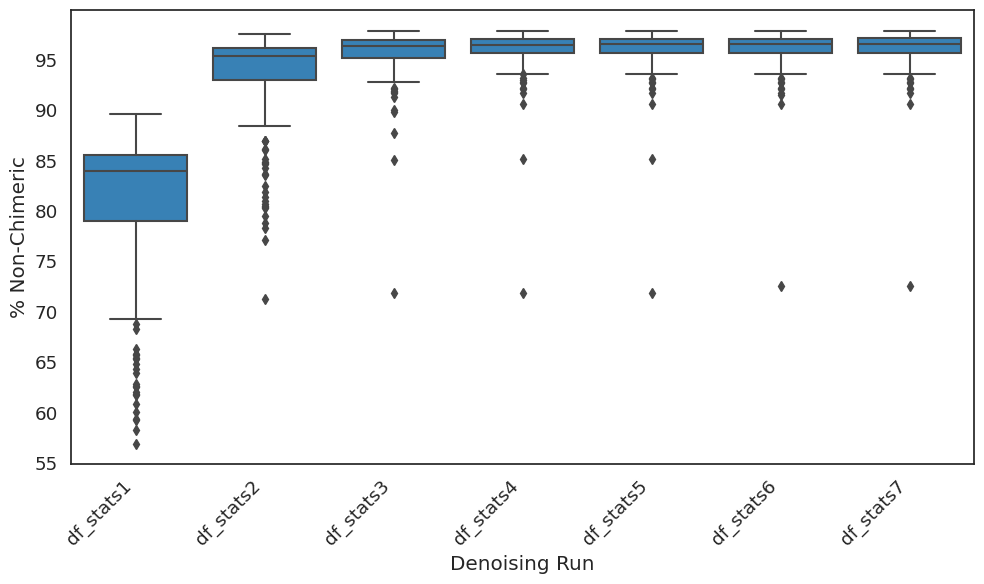

In [52]:
sns.set(rc={'figure.figsize': (10, 6)}, style='white')

with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.boxplot(
        data=combined,
        x='group',
        y='percentage of input non-chimeric',
        color='#2385ca'
    )

    ax.set_xlabel('Denoising Run')
    ax.set_ylabel('% Non-Chimeric')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


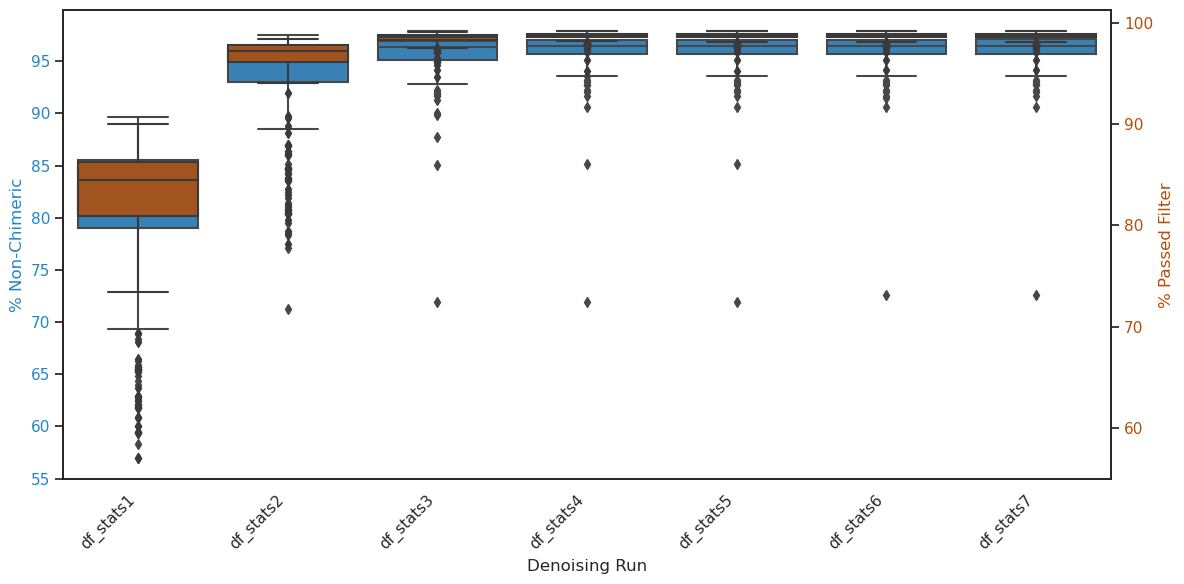

In [54]:

combined_nc = pd.DataFrame()
for df, name in zip(dfs, group_names):
    temp = df.copy()
    temp["group"] = name
    combined_nc = pd.concat([combined_nc, temp], ignore_index=True)

combined_pf = pd.DataFrame()
for df, name in zip(dfs, group_names):
    temp = df.copy()
    temp["group"] = name
    combined_pf = pd.concat([combined_pf, temp], ignore_index=True)

sns.set(style='white', rc={'figure.figsize': (12, 6)})
fig, ax1 = plt.subplots()

# Linke Y-Achse: non-chimeric
sns.boxplot(
    data=combined_nc,
    x='group',
    y='percentage of input non-chimeric',
    color='#2385ca',
    ax=ax1
)
ax1.set_ylabel('% Non-Chimeric', color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')
ax1.set_xlabel('Denoising Run')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Rechte Y-Achse: percentage of input passed filter
ax2 = ax1.twinx()
sns.boxplot(
    data=combined_pf,
    x='group',
    y='percentage of input passed filter',
    color='#b64e0a',
    ax=ax2
)
ax2.set_ylabel('% Passed Filter', color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

plt.tight_layout()
plt.show()


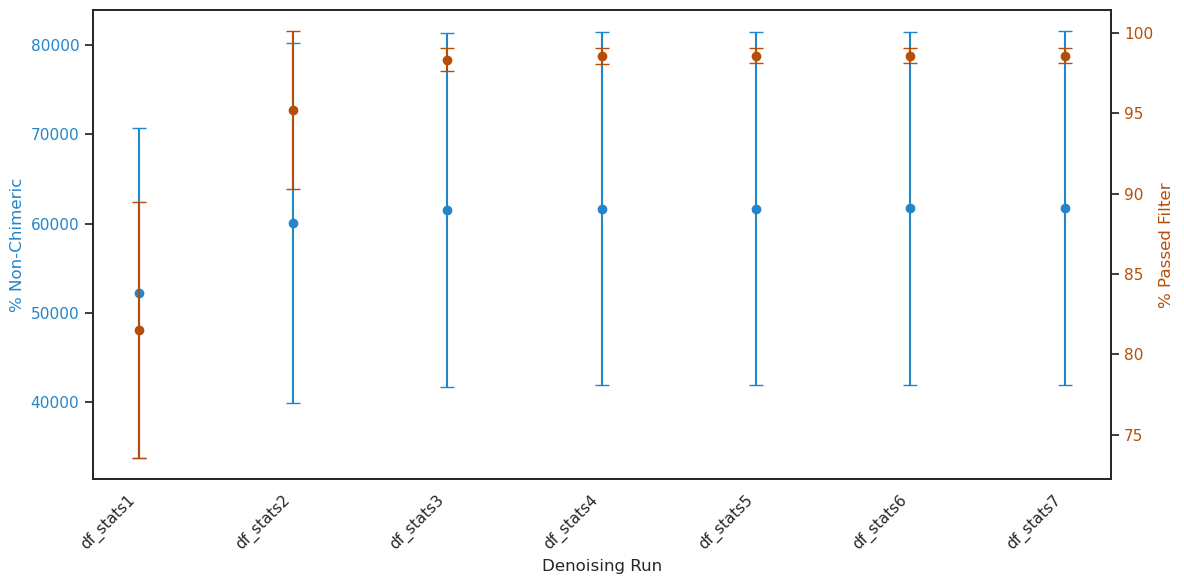

In [55]:

groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]

# Berechne Mittelwerte und Standardabweichungen
mean_nc = [df["non-chimeric"].mean() for df in dfs]
std_nc = [df["non-chimeric"].std() for df in dfs]

mean_pf = [df["percentage of input passed filter"].mean() for df in dfs]
std_pf = [df["percentage of input passed filter"].std() for df in dfs]

x = np.arange(len(groups))  # numerische X-Positionen

fig, ax1 = plt.subplots(figsize=(12, 6))

# Linke Y-Achse: non-chimeric
ax1.errorbar(x, mean_nc, yerr=std_nc, fmt='o', color='#2385ca', capsize=5, label='% Non-Chimeric')
ax1.set_ylabel('% Non-Chimeric', color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')
ax1.set_xticks(x)
ax1.set_xticklabels(groups, rotation=45, ha='right')
ax1.set_xlabel('Denoising Run')

# Rechte Y-Achse: percentage of input passed filter
ax2 = ax1.twinx()
ax2.errorbar(x, mean_pf, yerr=std_pf, fmt='o', color='#b64e0a', capsize=5, label='% Passed Filter')
ax2.set_ylabel('% Passed Filter', color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

plt.tight_layout()
plt.show()


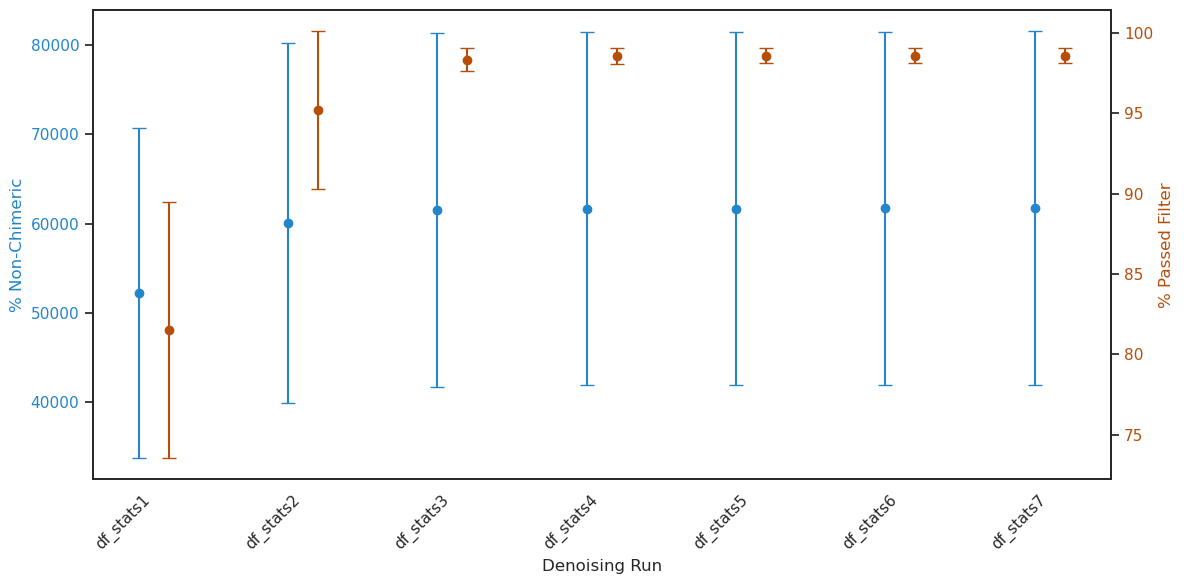

In [56]:
import matplotlib.pyplot as plt
import numpy as np

groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]

# Mittelwerte und Standardabweichungen
mean_nc = [df["non-chimeric"].mean() for df in dfs]
std_nc = [df["non-chimeric"].std() for df in dfs]

mean_pf = [df["percentage of input passed filter"].mean() for df in dfs]
std_pf = [df["percentage of input passed filter"].std() for df in dfs]

x = np.arange(len(groups))  # numerische X-Positionen

fig, ax1 = plt.subplots(figsize=(12, 6))

# Abstand zum Nebeneinanderstellen
width = 0.2

# Linke Y-Achse: non-chimeric
ax1.errorbar(x - width/2, mean_nc, yerr=std_nc, fmt='o', color='#2385ca', capsize=5, label='% Non-Chimeric')
ax1.set_ylabel('% Non-Chimeric', color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')

# X-Achse
ax1.set_xticks(x)
ax1.set_xticklabels(groups, rotation=45, ha='right')
ax1.set_xlabel('Denoising Run')

# Rechte Y-Achse: percentage of input passed filter
ax2 = ax1.twinx()
ax2.errorbar(x + width/2, mean_pf, yerr=std_pf, fmt='o', color='#b64e0a', capsize=5, label='% Passed Filter')
ax2.set_ylabel('% Passed Filter', color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

plt.tight_layout()
plt.show()


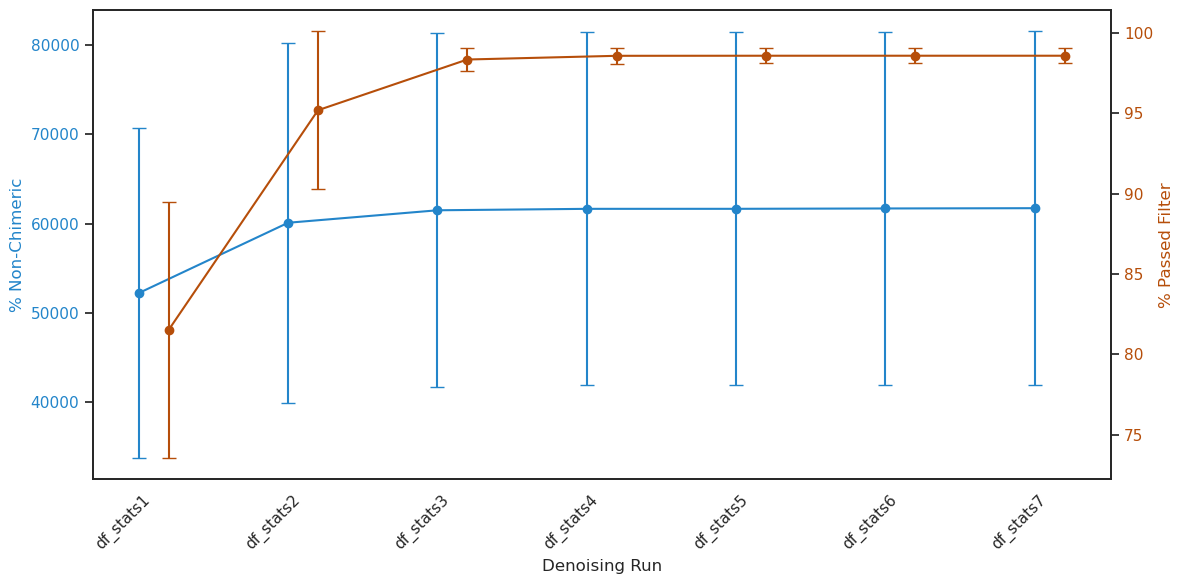

In [57]:
import matplotlib.pyplot as plt
import numpy as np

groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]

# Mittelwerte und Standardabweichungen
mean_nc = [df["non-chimeric"].mean() for df in dfs]
std_nc = [df["non-chimeric"].std() for df in dfs]

mean_pf = [df["percentage of input passed filter"].mean() for df in dfs]
std_pf = [df["percentage of input passed filter"].std() for df in dfs]

x = np.arange(len(groups))  # numerische X-Positionen
width = 0.2  # Abstand für Nebeneinanderstellen

fig, ax1 = plt.subplots(figsize=(12, 6))

# Linke Y-Achse: non-chimeric
ax1.errorbar(x - width/2, mean_nc, yerr=std_nc, fmt='o', color='#2385ca', capsize=5, label='% Non-Chimeric')
ax1.plot(x - width/2, mean_nc, color='#2385ca')  # Linie verbinden
ax1.set_ylabel('% Non-Chimeric', color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')

# X-Achse
ax1.set_xticks(x)
ax1.set_xticklabels(groups, rotation=45, ha='right')
ax1.set_xlabel('Denoising Run')

# Rechte Y-Achse: percentage of input passed filter
ax2 = ax1.twinx()
ax2.errorbar(x + width/2, mean_pf, yerr=std_pf, fmt='o', color='#b64e0a', capsize=5, label='% Passed Filter')
ax2.plot(x + width/2, mean_pf, color='#b64e0a')  # Linie verbinden
ax2.set_ylabel('% Passed Filter', color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

plt.tight_layout()
plt.show()


scatterplot mit durchschnittswerte

In [58]:
groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]
means = [
    df_stats1["non-chimeric"].mean(),
    df_stats2["non-chimeric"].mean(),
    df_stats3["non-chimeric"].mean(),
    df_stats4["non-chimeric"].mean(),
    df_stats5["non-chimeric"].mean(),
    df_stats6["non-chimeric"].mean(),
    df_stats7["non-chimeric"].mean()
]

df_means = pd.DataFrame({"group": groups, "mean_non_chimeric": means})


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_85/819352120.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


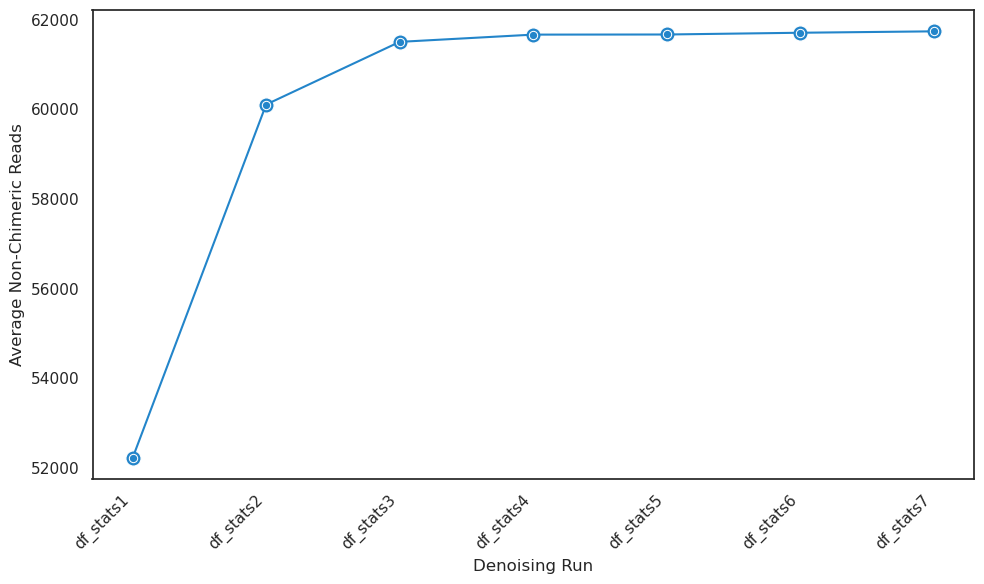

In [59]:

sns.set(rc={'figure.figsize': (10, 6)}, style='white')

sns.lineplot(data=df_means, x='group', y='mean_non_chimeric', marker='o', color='#2385ca')


with sns.plotting_context("notebook", font_scale=1.2):
    ax = sns.scatterplot(
        data=df_means,
        x='group',
        y='mean_non_chimeric',
        s=120,
        color='#2385ca'
    )

    ax.set_xlabel('Denoising Run')
    ax.set_ylabel('Average Non-Chimeric Reads')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


scatterplot mit average non chimeric links und average passed denoised rechts

In [5]:
groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]

# Mittelwerte links (non-chimeric)
mean_non_chimeric = [
    df_stats1["non-chimeric"].mean(),
    df_stats2["non-chimeric"].mean(),
    df_stats3["non-chimeric"].mean(),
    df_stats4["non-chimeric"].mean(),
    df_stats5["non-chimeric"].mean(),
    df_stats6["non-chimeric"].mean(),
    df_stats7["non-chimeric"].mean()
]

# Mittelwerte rechts (percentage of input passed filter)
mean_passed_filter = [
    df_stats1["percentage of input passed filter"].mean(),
    df_stats2["percentage of input passed filter"].mean(),
    df_stats3["percentage of input passed filter"].mean(),
    df_stats4["percentage of input passed filter"].mean(),
    df_stats5["percentage of input passed filter"].mean(),
    df_stats6["percentage of input passed filter"].mean(),
    df_stats7["percentage of input passed filter"].mean()
]


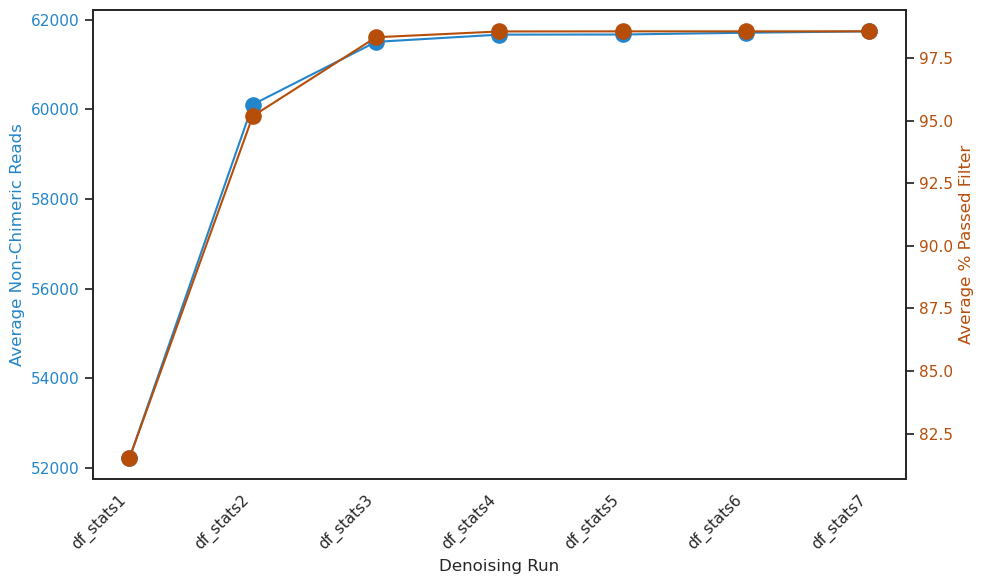

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 6)}, style='white')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Linke Y-Achse (non-chimeric)
ax1.plot(groups, mean_non_chimeric, marker='o', color='#2385ca')
ax1.scatter(groups, mean_non_chimeric, color='#2385ca', s=120)
ax1.set_xlabel("Denoising Run")
ax1.set_ylabel("Average Non-Chimeric Reads", color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')
plt.xticks(rotation=45, ha='right')

# Rechte Y-Achse
ax2 = ax1.twinx()
ax2.plot(groups, mean_passed_filter, marker='o', color='#b64e0a')
ax2.scatter(groups, mean_passed_filter, color='#b64e0a', s=120)
ax2.set_ylabel("Average % Passed Filter", color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

plt.tight_layout()
plt.show()


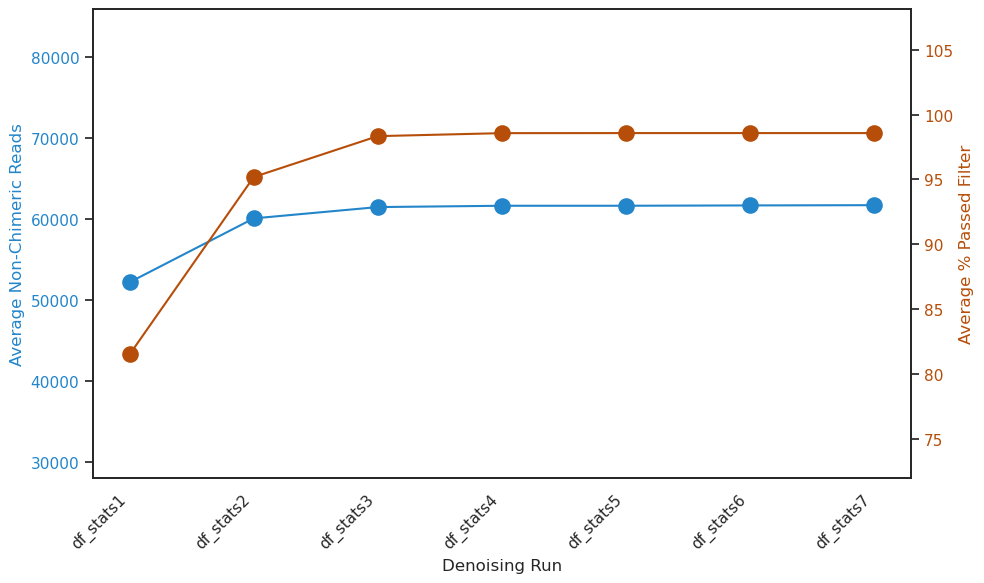

In [13]:
dfs = [df_stats1, df_stats2, df_stats3, df_stats4, df_stats5, df_stats6, df_stats7]

groups = ["df_stats1", "df_stats2", "df_stats3", "df_stats4", "df_stats5", "df_stats6", "df_stats7"]

# Mittelwerte links (non-chimeric)
mean_non_chimeric = [
    df_stats1["non-chimeric"].mean(),
    df_stats2["non-chimeric"].mean(),
    df_stats3["non-chimeric"].mean(),
    df_stats4["non-chimeric"].mean(),
    df_stats5["non-chimeric"].mean(),
    df_stats6["non-chimeric"].mean(),
    df_stats7["non-chimeric"].mean()
]

# Mittelwerte rechts (percentage of input passed filter)
mean_passed_filter = [
    df_stats1["percentage of input passed filter"].mean(),
    df_stats2["percentage of input passed filter"].mean(),
    df_stats3["percentage of input passed filter"].mean(),
    df_stats4["percentage of input passed filter"].mean(),
    df_stats5["percentage of input passed filter"].mean(),
    df_stats6["percentage of input passed filter"].mean(),
    df_stats7["percentage of input passed filter"].mean()
]

mean_nc = [df["non-chimeric"].mean() for df in dfs]
std_nc = [df["non-chimeric"].std() for df in dfs]

mean_pf = [df["percentage of input passed filter"].mean() for df in dfs]
std_pf = [df["percentage of input passed filter"].std() for df in dfs]


sns.set(rc={'figure.figsize': (10, 6)}, style='white')
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(groups, mean_non_chimeric, marker='o', color='#2385ca')
ax1.scatter(groups, mean_non_chimeric, color='#2385ca', s=120)
ax1.set_xlabel("Denoising Run")
ax1.set_ylabel("Average Non-Chimeric Reads", color='#2385ca')
ax1.tick_params(axis='y', labelcolor='#2385ca')

ax1.set_ylim(min(mean_nc) - max(std_nc)*1.2, max(mean_nc) + max(std_nc)*1.2)

plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(groups, mean_passed_filter, marker='o', color='#b64e0a')
ax2.scatter(groups, mean_passed_filter, color='#b64e0a', s=120)
ax2.set_ylabel("Average % Passed Filter", color='#b64e0a')
ax2.tick_params(axis='y', labelcolor='#b64e0a')

ax2.set_ylim(min(mean_pf) - max(std_pf)*1.2, max(mean_pf) + max(std_pf)*1.2)

plt.tight_layout()
plt.show()


# 04 Taxonomy

classifier = unite_ver10_dynamic_s_all_19.02.2025-Q2-2024.10.qza

Code send to Euler:

In [ ]:
#!/bin/bash
#SBATCH --job-name=taxonomy_job
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --mem-per-cpu=128G
#SBATCH --time=24:00:00
#SBATCH --output=taxonomy_output_%j.txt
#SBATCH --mail-type=END

module load stack/2024-06 gcc/12.2.0 python/3.10

source ~/miniconda3/etc/profile.d/conda.sh
conda activate qiime2-amplicon-2025.7


qiime feature-classifier classify-sklearn \
  --i-classifier unite_ver10_dynamic_s_all_19.02.2025-Q2-2024.10.qza \
  --i-reads rep_seqs_trimmed.qza \
  --p-reads-per-batch 1000 \
  --p-n-jobs 0 \
  --o-classification taxonomy.qza

### 04.02 Visualization of the taxonomy classification

In [36]:
! qiime metadata tabulate \
    --m-input-file $data_dir/04/taxonomy.qza \
    --o-visualization $data_dir/04/taxonomy.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/04/taxonomy.qzv


In [2]:
Visualization.load(f"{data_dir}/04/taxonomy.qzv")

<visualization: Visualization uuid: b44929b7-112d-477a-8b6b-f389d0e51f76>

In [38]:
! qiime taxa barplot \
    --i-table $data_dir/03/dada2_table.qza \
    --i-taxonomy $data_dir/04/taxonomy.qza \
    --m-metadata-file $data_dir/01/metadata_ed.tsv \
    --o-visualization $data_dir/04/taxa-bar-plots.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/04/taxa-bar-plots.qzv


In [3]:
Visualization.load(f"{data_dir}/04/taxa-bar-plots.qzv")

<visualization: Visualization uuid: 521f1d88-d343-409f-9b74-d73a0a9c2045>

# 05 Cleaning data after taxonomic assignment 

## 05.01 classification of unassigned reads

| sample ID | BLAST | Kann herausgelöscht werden weil |
|-------|-------|-------|
| fed424ac80555019c8816c6efb6f2004   | Fungal endophyte isolate   |  No precise classification   |
| 1ada978c8f3ff08af2668393869257ac    | Rhodotorula mucilaginosa  | Mostly from environmental sources | 
| 201dcc24ff7662a5eb05f31a0d0ca6c0    | no BLAST result found   |      |
| 270002b21dcf309398fe1f945dc902e0    | uncultured fugus   |      |
| 27e5e1e9ffac83de20b1ed2784cecee4    | Rhodotorula mucilaginosa   | Mostly from environmental sources |
| 288c841878718e65bd3f27b674c5b16a    | Mucor racemosus   | Mostly from environmental sources  |
| 31bd8178bf3013d48c62813a535b9e09 | Torulaspora delbrueckii |  Mostly from environmental sources |
| 3e2d3eecabe4355bd15aeab85aebaa83 | Rhodotorula mucilaginosa | Mostly from environmental sources |
| 478e194c1ec118f79940439cc0c7fd36 | Cladosporium allicinum | plant leaves |
| 4af6fc99c1acf99c1b82d1db3a538c9e | Uncultured fungus | |
| 54e88722f1d30a88eaaf19efc686d249 | Uncultured basidiomycete |  |
| 58de98eb759b336275f22b9a976e97e1 | Rhodotorula mucilaginosa | Mostly from environmental sources |
| 5ad3902302653fe8bb0b938de1d18f68 | Uncultured fungus clone |  |
| 68da1589cb5aa90483bf9ddded795ff5 | Uncultured fungus clone |  |
| 73c2e92790e785ec39b58026ed4010ef | Candida glabrata |k__Fungi;p__Ascomycota;sp__Saccharomycotina;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__glabrata
  |
| 818fb915612b44bbbd91b854c738a057 | Fungal endophyte | in plants |
| 97d39fb074a634f6e55e91dd89e69c89 | Blastocystis | parasit |
| a0dc22f3ab283a0afd30e730590fb85c | Uncultured fungus |  |
| a2805006a5012b036fa721982c1324fb | Rhizopus oryzae strain |Mostly from environmental sources|
| afbfe0c693e41ecdd14938a045832793 | Rhodotorula mucilaginosa |Mostly from environmental sources  |
| b2cf5a969f4c7a2f29d49b4216a39244 | Kluyveromyces marxianus | Mostly from environmental sources |
| beb8f130fd78d92d09b9aa1e37fec750 | Escherichia coli | Bacteria |
| c6a89f484b775e3a8a0842ec9d7568e1 | Uncultured fungus |  |
| c84004c0020de7d6ff5bde95677e8688 | Uncultured fungus |  |
| c9da8911059b1b0a4a2980d229a06a69 | Candida albicans  | k__Fungi;p__Ascomycota;sp__Saccharomycotina;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Candida;s__albicans
 |
| d8c7c2823a15d6d0e95a8003cf1cc15b | Rhodotorula mucilaginosa |Mostly from environmental sources  |
| d94d771c3041404138de7df8e52c6cd1 | Aethes rutilana genome assembly | Metazoa |
| ddf643cb96fee9d6ecd44d938b35bd61 | Uncultured fungus  |  |
| eff5b3a232c5c37acde9e8fc390d2c12 | no BLAST result found|  |
| f931ac9a7305cdd99a02c25a624e5bb8 | Pichia kudriavzevii  | Mostly from environmental sources |
| fa340e00a973844b027665f54f7f6fb0 | Rhodotorula mucilaginosa  | Mostly from environmental sources |




The unassigned reads are mostly species that belong to an environmental source (they do not grow in the gut), they are uncultutred or not from a fungal source. Two unassigned reads that could be considered as a part of the microbiome are Candida albicans and Candida glabrata.

Samples that have to be removed (over 50% unassigned or another species than fungi):
ERR5327575
ERR5327509
ERR5327351
ERR5327544
ERR5327300
ERR5327338
ERR5327529
ERR5327533
ERR5327364
ERR5327535

## 05.02 Removing everything that is unassigned / not fungi

Clean tsv

In [40]:
rem = ["ERR5327575", "ERR5327509", "ERR5327351", "ERR5327544", "ERR5327300", "ERR5327338", "ERR5327529", "ERR5327533", "ERR5327364", "ERR5327535"]

In [41]:
metadata_ed_rem = metadata_ed[~metadata_ed["ID"].isin(rem)]

In [42]:
metadata_ed_rem.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample,habitat_density1,habitat_density_percent,urban/rural,BMI_category
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,I do not have this condition,No,167906.0,42.0,peri-urban,Underweight
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,I was diagnosed with gluten allergy (anti-glut...,149537.0,37.0,peri-urban,Normal
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,I do not eat gluten because it makes me feel bad,149537.0,37.0,peri-urban,Normal
3,ERR5327282,United Kingdom,Not provided,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No,269388.0,67.0,urban,Normal
4,ERR5327284,United Kingdom,Not provided,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No,380431.0,95.0,urban,Normal


In [43]:
metadata_ed_rem.to_csv(f"{data_dir}/05/metadata_ed_rem.tsv", sep="\t", index=False)

Clean qza

In [44]:
"""with open("remove_ids.tsv", "w") as f:
    f.write("sample-id\n")         
    for id_ in rem:
        f.write(id_ + "\n")"""

In [45]:
"""! qiime feature-table filter-samples \
  --i-table $data_dir/03/dada2_table.qza \
  --m-metadata-file $data_dir/05/remove_ids.tsv \
  --p-exclude-ids \
  --o-filtered-table $data_dir/05/dada2_table_rem.qza"""

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/05/dada2_table_rem.qza


In [48]:
!qiime feature-table filter-samples \
    --i-table $data_dir/03/dada2_table.qza \
    --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
    --o-filtered-table $data_dir/03/dada2_table_filtered_samples_removed.qza 

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/03/dada2_table_filtered_samples_removed.qza


## 05.03 filter out the features from the remaining data

diese dateien werden gebraucht für boot

In [53]:
! qiime taxa filter-table \
    --i-table $data_dir/03/dada2_table_filtered_samples_removed.qza  \
    --i-taxonomy $data_dir/04/taxonomy.qza \
    --p-exclude Protista,Eukaryota_kgd_Incertae_sedis,Ichthyosporia,Metazoa,Viridiplantae \
    --p-include p__ \
    --o-filtered-table $data_dir/05/table_filtered.qza

! qiime taxa filter-seqs \
    --i-sequences $data_dir/03/dada2_rep_seqs.qza \
    --i-taxonomy $data_dir/04/taxonomy.qza \
    --p-exclude Protista,Eukaryota_kgd_Incertae_sedis,Ichthyosporia,Metazoa,Viridiplantae \
    --p-include p__ \
    --o-filtered-sequences $data_dir/05/dada2_rep_seqs_filtered.qza

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: livia_data/05/table_filtered.qza
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureData[Sequence] to: livia_data/05/dada2_rep_seqs_filtered.qza


In [50]:
! qiime taxa barplot \
    --i-table $data_dir/05/table_filtered.qza \
    --i-taxonomy $data_dir/04/taxonomy.qza \
    --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
    --o-visualization $data_dir/05/taxa-bar-plots-filtered.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/05/taxa-bar-plots-filtered.qzv


In [5]:
Visualization.load(f"{data_dir}/05/taxa-bar-plots-filtered.qzv")

<visualization: Visualization uuid: 98a1a0d0-9d8c-4b86-9704-72f3c8e59131>

In [51]:
! qiime feature-table summarize \
  --i-table $data_dir/05/table_filtered.qza \
  --o-visualization $data_dir/05/table_filtered.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/05/table_filtered.qzv


In [4]:
Visualization.load(f"{data_dir}/05/table_filtered.qzv")

<visualization: Visualization uuid: 11d61be0-9d6a-4c55-a946-ba3b19571cf1>

# Boots

In [ ]:
qiime boots kmer-diversity \

In [6]:
! qiime boots kmer-diversity \ help

Usage: qiime boots kmer-diversity [OPTIONS]

  Given a single feature table as input, this action resamples the feature
  table `n` times to a total frequency of `sampling depth` per sample. It then
  splits all input sequences into kmers, and computes common alpha and beta
  diversity on each resulting kmer table. The resulting artifacts are then
  averaged using the method specified by `alpha_average_method` and
  `beta_average_method` parameters. The resulting average alpha and beta
  diversity artifacts are returned, along with a scatter plot integrated all
  alpha diversity metrics and the PCoA axes for all beta diversity metrics.

Inputs:
  --i-table ARTIFACT FeatureTable[Frequency | RelativeFrequency |
    PresenceAbsence]      The input feature table.                  [required]
  --i-sequences ARTIFACT FeatureData[Sequence | RNASequence |
    ProteinSequence]      Input sequences for kmerization.          [required]
Parameters:
  --p-sampling-depth INTEGER
    Range(1, None)  

# Functional analysis

## Explanation

Paper: https://www.sciencedirect.com/science/article/pii/S1754504815000847?via%3Dihub

FUNGuild was used to match the taxons obtained in the chapter taxonomy to ecological guilds. The obtained results that were looked at were trophic modes and guilds.

Trophic Modes: 
'Pathotroph-Saprotroph', 'Saprotroph',
       ' Pathotroph-Saprotroph-Symbiotroph',
       'Pathotroph-Saprotroph-Symbiotroph', ' Saprotroph',
       ' Pathotroph-Pathotroph-Saprotroph', 'Saprotroph-Symbiotroph',
       'Pathotroph', 'Pathotroph-Symbiotroph', 'Symbiotroph'

One of three trophic categories [Pathotroph = receiving nutrients at the expense of the host cells and causing disease (e.g., biotroph, parasite, pathogen, etc.); Saprotroph = receiving nutrients by breaking down dead host cells (e.g., wood rotters, litter rotters, etc.); Symbiotroph = receiving nutrients by exchanging resources with host cells (e.g., ectomycorrhiza, lichens, etc.)]. 

## Table

In [26]:
! qiime tools export \
  --input-path $data_dir/04/taxonomy.qza \
  --output-path $data_dir/07


/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Exported livia_data/04/taxonomy.qza as TSVTaxonomyDirectoryFormat to directory livia_data/07


In [27]:
! qiime tools export \
  --input-path $data_dir/05/table_filtered.qza \
  --output-path $data_dir/07


/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Exported livia_data/05/table_filtered.qza as BIOMV210DirFmt to directory livia_data/07


In [28]:
! biom convert -i $data_dir/07/feature-table.biom \
  -o $data_dir/07/feature-table.tsv --to-tsv

In [32]:
! head -n 2 $data_dir/07/taxonomy.tsv
! head -n 2 $data_dir/07/feature-table.tsv


Feature ID	Taxon	Confidence
f1e00c6f31a5546a15c206010ff3583c	k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetales_fam_Incertae_sedis;g__Candida;s__Candida_albicans	0.8593797823719923
# Constructed from biom file
#OTU ID	ERR5327198	ERR5327199	ERR5327266	ERR5327282	ERR5327284	ERR5327285	ERR5327287	ERR5327288	ERR5327289	ERR5327303	ERR5327305	ERR5327308	ERR5327311	ERR5327313	ERR5327314	ERR5327316	ERR5327317	ERR5327318	ERR5327322	ERR5327323	ERR5327325	ERR5327326	ERR5327327	ERR5327329	ERR5327332	ERR5327335	ERR5327340	ERR5327343	ERR5327344	ERR5327346	ERR5327348	ERR5327349	ERR5327352	ERR5327353	ERR5327354	ERR5327355	ERR5327356	ERR5327360	ERR5327361	ERR5327362	ERR5327363	ERR5327367	ERR5327370	ERR5327379	ERR5327387	ERR5327388	ERR5327394	ERR5327395	ERR5327396	ERR5327401	ERR5327402	ERR5327404	ERR5327405	ERR5327406	ERR5327407	ERR5327408	ERR5327409	ERR5327410	ERR5327412	ERR5327414	ERR5327415	ERR5327416	ERR5327418	ERR5327419	ERR5327421	ERR5327426	ERR5327427	ERR5327428	E

In [33]:
# create a list of ASV IDs from the filtered feature table
! cut -f1 $data_dir/07/feature-table.tsv \
  | tail -n +3 \
  > $data_dir/07/filtered_ids.txt

# filter taxonomy.tsv based on those IDs
! awk 'NR==1{print; next} FNR==NR{ids[$1]=1; next} ($1 in ids)' \
  $data_dir/07/filtered_ids.txt \
  $data_dir/07/taxonomy.tsv \
  > $data_dir/07/taxonomy_filtered.tsv


/usr/bin/sh: line 1: /07/taxonomy_filtered.tsv: No such file or directory


In [34]:
import csv

ids = set()
with open(f"{data_dir}/07/feature-table.tsv") as f:
    r = csv.reader(f, delimiter='\t')
    next(r)  # skip first line
    next(r)  # skip second line
    for row in r:
        ids.add(row[0])

with open(f"{data_dir}/07/taxonomy.tsv") as inf, open(f"{data_dir}/07/taxonomy_filtered_for_funguild.tsv","w") as outf:
    r = csv.reader(inf, delimiter='\t')
    w = csv.writer(outf, delimiter='\t', lineterminator='\n')
    header = next(r)
    w.writerow(header)
    for row in r:
        if row[0] in ids:
            w.writerow(row)


In [23]:
! git clone https://github.com/UMNFuN/FUNGuild
! cd FUNGuild/

Cloning into 'FUNGuild'...
remote: Enumerating objects: 511, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 511 (delta 25), reused 28 (delta 10), pack-reused 460 (from 1)
Receiving objects: 100% (511/511), 1.05 MiB | 10.06 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [37]:
tax_df = pd.read_csv(f"{data_dir}/07/taxonomy_filtered_for_funguild.tsv", sep="\t")

tax_df = tax_df.rename(columns={"Taxon": "taxonomy"})

tax_df.to_csv(f"{data_dir}/07/taxonomy_filtered_for_funguild.txt", sep="\t", index=False)


In [38]:
!python $data_dir/FUNGuild/Guilds_v1.1.py -otu $data_dir/07/taxonomy_filtered_for_funguild.txt -db fungi 

FunGuild v1.1 Beta
Connecting with FUNGuild database ...

Reading in the OTU table: 'livia_data/07/taxonomy_filtered_for_funguild.txt'

Searching the FUNGuild database...
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%

Found 1154 matching taxonomy records in the database.
Dereplicating and sorting the result...
FunGuild tried to assign function to 907 OTUs in 'livia_data/07/taxonomy_filtered_for_funguild.txt'.
FUNGuild made assignments on 709 OTUs.
Result saved to 'livia_data/07/taxonomy_filtered_for_funguild.guilds.txt'

Total calculating time: 5.16 seconds.


In [40]:
mv $data_dir/07/taxonomy_filtered_for_funguild.guilds.txt $data_dir/07/taxonomy_filtered_for_funguild.guilds.tsv

In [3]:
funguild_df = pd.read_csv(f"{data_dir}/07/taxonomy_filtered_for_funguild.guilds.tsv", sep="\t")

In [4]:
funguild_df.head(10)

,Feature ID,taxonomy,Confidence,Taxon,Taxon Level,Trophic Mode,Guild,Growth Morphology,Trait,Confidence Ranking,Notes,Citation/Source
0,0048079d52e0b654423c0c89021b8a34,k__Fungi;p__Basidiomycota;c__Agaricomycetes;o_...,0.873261,Pleurotus,13,Pathotroph-Saprotroph,Endophyte-Nematophagous-Plant Pathogen-|Wood S...,Agaricoid,White Rot,Probable,As white_rot (Põlme et al. 2020); As wood_path...,"James TY, et al. 2006. Nature 443:818-822 ((ht..."
1,004c991a685b11054001b8c7d0a68543,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.940547,Saccharomycetales,7,Saprotroph,Undefined Saprotroph,Yeast,NaN,Possible,NaN,"Sterkenburg E, et al. 2015. New Phytologist 20..."
2,0113430ae816d67262d3c86660ecd51e,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.784663,Saccharomycetales,7,Saprotroph,Undefined Saprotroph,Yeast,NaN,Possible,NaN,"Sterkenburg E, et al. 2015. New Phytologist 20..."
3,01202eb8b50e4b6ac670afc696cf804c,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eu...,0.999731,Aspergillus,13,Pathotroph-Saprotroph-Symbiotroph,Animal Pathogen-Endophyte-Plant Saprotroph-|Un...,Microfungus,NaN,Probable,As foliar_endophyte (Põlme et al. 2020); Decay...,"Seehann G, et al. 1975. List of Fungi in Soft-..."
4,014a604d3dadcb95ddc73b1d6c642b45,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.719939,Geotrichum,13,Pathotroph-Saprotroph,Animal Pathogen-Plant Pathogen-|Undefined Sapr...,Microfungus,NaN,Probable,As nectar-tap_saprotroph (Põlme et al. 2020); ...,"Thornton CR, et al. 2010. International Journa..."
5,01ab17a41e837c842a5a232385a99169,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.953302,Candida,13,Pathotroph-Saprotroph-Symbiotroph,Animal Pathogen-Endophyte-Endosymbiont-Epiphyt...,Dimorphic Yeast-Yeast,NaN,Probable,As nectar-tap_saprotroph (Põlme et al. 2020); ...,"Manolakaki D, et al. 2010. Virulence. 1: 367-3..."
6,01e18595cbc8657c0d473551d11cbfd8,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.788226,Clavispora,13,Pathotroph-Saprotroph,Animal Pathogen-|Plant Saprotroph|-Undefined S...,Yeast,NaN,Probable,As litter_saprotroph (Põlme et al. 2020); As n...,"Laszlo I, Meyer W. 2015. Microbiology Australi..."
7,022179b4d7a2a636074aec54acf880a2,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.701039,Geotrichum,13,Pathotroph-Saprotroph,Animal Pathogen-Plant Pathogen-|Undefined Sapr...,Microfungus,NaN,Probable,As nectar-tap_saprotroph (Põlme et al. 2020); ...,"Thornton CR, et al. 2010. International Journa..."
8,023f11c252bfcba4c46f55747e0c906f,k__Fungi;p__Ascomycota;c__Saccharomycetes;o__S...,0.999587,Pichia,13,Pathotroph-Saprotroph-Symbiotroph,Animal Parasite-Animal Pathogen-Animal Symbiot...,Yeast,NaN,Probable,As nectar-tap_saprotroph (Põlme et al. 2020); ...,"Kurtzman CP, et al. (eds.) 2011. The Yeasts, a..."
9,029a6c7ee83f012641a7722e3234eb3e,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eu...,0.830341,Penicillium,13,Pathotroph-Saprotroph-Symbiotroph,Animal Parasite-Dung Saprotroph-Endophyte-Fung...,Microfungus,Soft Rot,Highly Probable,As foliar_endophyte (Põlme et al. 2020); As my...,"Duncan CG, Eslyn WE. 1966. Mycologia 58:642-66..."


## Auswertung

In [71]:
funguild_df = pd.read_csv(f"{data_dir}/07/taxonomy_filtered_for_funguild.guilds.tsv", sep="\t")

In [6]:
trophic_mode = funguild_df['Trophic Mode'].unique()


In [9]:
funguild_df['Trophic Mode'].value_counts()

Trophic Mode
Saprotroph                            294
Pathotroph-Saprotroph                 212
-                                     198
Pathotroph-Saprotroph-Symbiotroph     137
 Pathotroph-Saprotroph-Symbiotroph     20
 Saprotroph                            18
Saprotroph-Symbiotroph                 15
Pathotroph                              8
Pathotroph-Symbiotroph                  3
 Pathotroph-Pathotroph-Saprotroph       1
Symbiotroph                             1
Name: count, dtype: int64

In [46]:
funguild_df['Confidence Ranking'].value_counts()

Confidence Ranking
Probable           410
Possible           247
-                  198
Highly Probable     52
Name: count, dtype: int64

In [50]:
funguild_df['Guild'].value_counts().head(10)  # top 10 guilds


Guild
Undefined Saprotroph                                                                                               202
-                                                                                                                  198
Animal Pathogen-Plant Pathogen-|Undefined Saprotroph|                                                              108
|Undefined Saprotroph|                                                                                              89
Animal Pathogen-Endophyte-Endosymbiont-Epiphyte-|Undefined Saprotroph|                                              46
Animal Pathogen-|Plant Saprotroph|-Undefined Saprotroph                                                             41
Animal Parasite-Animal Pathogen-Animal Symbiotroph-Plant Pathogen-|Undefined Saprotroph|                            35
Animal Parasite-Dung Saprotroph-Endophyte-Fungal Parasite-Plant Pathogen-|Undefined Saprotroph|-Wood Saprotroph     27
|Animal Parasite|-Animal Pathogen-Undefine

In [52]:
funguild_df['Growth Morphology'].value_counts()

Growth Morphology
Yeast                                              384
Microfungus                                        235
-                                                  198
Dimorphic Yeast-Yeast                               47
Agaricoid                                            8
Dimorphic-Facultative Yeast                          6
Microfungus-Yeast                                    6
Polyporoid                                           4
Corticioid                                           3
Agaricoid-Gasteroid-Secotioid                        3
Facultative Yeast-Yeast                              2
Dimorphic                                            2
Agaricoid-Gasteroid-Microfungus-Secotioid-Yeast      2
Cyphelloid                                           1
Dimorphic-Yeast                                      1
Facultative Yeast-Microfungus                        1
Dimorphic-Dimorphic Yeast                            1
Corticioid-Polyporoid                          

## Plots

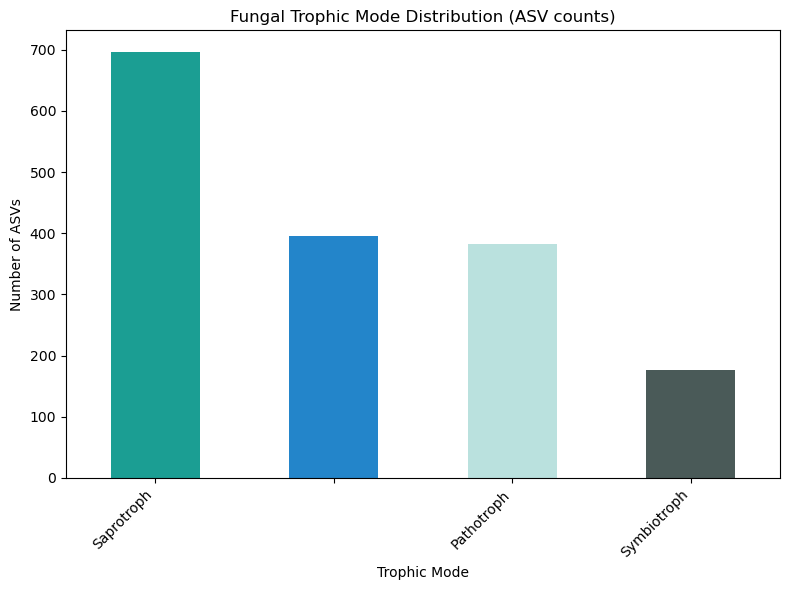

Trophic Mode counts:
Saprotroph     697
               396
Pathotroph     382
Symbiotroph    176
Name: count, dtype: int64


In [73]:
funguild_df = funguild_df.dropna(subset=['Trophic Mode'])

# --- 3. Multi-Trophic Modes aufsplitten ---
def split_trophic_modes(mode_str):
    if pd.isna(mode_str):
        return []
    # Split bei | oder - und Leerzeichen entfernen
    return [m.strip() for m in mode_str.replace('-', '|').split('|')]

# Liste aller Trophic Modes
all_modes = []
for modes in funguild_df['Trophic Mode']:
    all_modes.extend(split_trophic_modes(modes))

# --- 4. Zähle Vorkommen jedes Trophic Mode ---
mode_counts = pd.Series(all_modes).value_counts()

colors = ["#1b9e93", "#2385ca", "#bae1de", "#4a5a58", "#b6bdbc", "#d8a5f0", "#8c35b5", "#ed3779", "#73082f", "#f59331", "#a89925" ]

# --- 5. Balkendiagramm plotten ---
plt.figure(figsize=(8,6))
mode_counts.plot(kind='bar', color=colors)
plt.ylabel("Number of ASVs")
plt.xlabel("Trophic Mode")
plt.title("Fungal Trophic Mode Distribution (ASV counts)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 6. Ausgabe der Werte ---
print("Trophic Mode counts:")
print(mode_counts)

### 05.01 Alpha diversity

In [4]:
!qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/06/boots-kmer-diversity/alpha_diversities/shannon.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/alpha_diversity/alpha_shannon_group_significance.qzv

!qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/06/boots-kmer-diversity/alpha_diversities/observed_features.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/alpha_diversity/alpha_observed_features_group_significance.qzv

!qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/06/boots-kmer-diversity/alpha_diversities/pielou_e.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/alpha_diversity/alpha_pielou_e_group_significance.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/06/alpha_diversity/alpha_shannon_group_significance.qzv
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/06/alpha_diversity/alpha_observed_features_group_significance.qzv
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/lat

In [7]:
Visualization.load(f"{data_dir}/06/alpha_diversity/alpha_shannon_group_significance.qzv")

<visualization: Visualization uuid: 0e96d4d0-e5bd-47b8-ba94-6cdcc69a27fc>

In [2]:
Visualization.load(f"{data_dir}/06/alpha_diversity/alpha_observed_features_group_significance.qzv")

<visualization: Visualization uuid: 9b791508-2f13-4db2-9a48-cad6ac06605a>

In [7]:
Visualization.load(f"{data_dir}/06/alpha_diversity/alpha_pielou_e_group_significance.qzv")

<visualization: Visualization uuid: 8849e200-bfce-4f2f-adc9-2ec6ee544e82>

In [8]:
!qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/06/boots-kmer-diversity/alpha_diversities/shannon.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/alpha_diversity/alpha_shannon_corrleation.qzv

!qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/06/boots-kmer-diversity/alpha_diversities/observed_features.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/alpha_diversity/alpha_observed_features_correlation.qzv

!qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/06/boots-kmer-diversity/alpha_diversities/pielou_e.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/alpha_diversity/alpha_pielou_e_correlation.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/06/alpha_diversity/alpha_shannon_corrleation.qzv
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/06/alpha_diversity/alpha_observed_features_correlation.qzv
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resour

### Bray curtis and Jaccard

In [5]:
# Bray–Curtis
!qiime diversity pcoa \
  --i-distance-matrix $data_dir/06/boots-kmer-diversity/distance_matrices/braycurtis.qza \
  --o-pcoa $data_dir/06/beta_diversity_plots/kmer_bray_pcoa.qza

!qiime emperor plot \
  --i-pcoa $data_dir/06/beta_diversity_plots/kmer_bray_pcoa.qza \
  --m-metadata-file $data_dir/05/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/beta_diversity_plots/kmer_bray_emperor.qzv

# Jaccard
!qiime diversity pcoa \
  --i-distance-matrix $data_dir/06/boots-kmer-diversity/distance_matrices/jaccard.qza \
  --o-pcoa $data_dir/06/beta_diversity_plots/kmer_jaccard_pcoa.qzv

!qiime emperor plot \
  --i-pcoa $data_dir/06/beta_diversity_plots/kmer_jaccard_pcoa.qza \
  --m-metadata-file $data_dir/metadata_ed_rem.tsv \
  --o-visualization $data_dir/06/beta_diversity_plots/kmer_jaccard_emperor.qzv

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved PCoAResults to: livia_data/06/beta_diversity_plots/kmer_bray_pcoa.qza
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: livia_data/06/beta_diversity_plots/kmer_bray_emperor.qzv
/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_res

In [8]:
Visualization.load(f"{data_dir}/06/beta_diversity_plots/kmer_bray_emperor.qzv")

<visualization: Visualization uuid: e85b8a5f-62ec-4bee-8cbb-ec99542ab54f>

In [4]:
Visualization.load(f"{data_dir}/06/beta_diversity_plots/kmer_jaccard_pcoa.qzv")

ValueError: livia_data/06/beta_diversity_plots/kmer_jaccard_pcoa.qzv does not exist.

### 05.01 Beta diversity

In [ ]:
! qiime kmerizer core-metrics \
  --i-table $data_dir/feature-table.qza \
  --i-sequences $data_dir/rep-seqs.qza \
  --m-metadata-file $data_dir/metadata_proc.tsv \
  --p-sampling-depth 1500 \
  --p-kmer-size 8 \
  --output-dir $data_dir/kmerizer-results

In [ ]:
Koordinaten:
    geopandas
    paper + gis datei -> qgis
    urca

In [ ]:
Rarefaction based diversity analysis